# СберМаркет_тестовое задание

В задании я рассматриваю срез транзакций он-лайн площадки СберМаркет с 26-12-2018 по 18-12-2019.

Задача: найти все интересные инсайты и представить их в любом удобном виде (ноутбук желательно приложить). 

# Загрузка и предобработка данных

In [584]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.dates as mdates

In [585]:
#функция для загрузки и отображения стартовых данных о таблицах

def load_csv_choose_path(filename):
    """
    Функция читает csv файл 
    """
    if os.path.exists(filename):
        data = pd.read_csv(filename)
    else:
        raise FileNotFoundError(filename)
    print('-=',filename, '=-') 
    print()
    print(data.info())
    print()
    print('Количество дубликатов:', data.duplicated().sum())
    display(data.head())
    display(data.describe(include='all'))
    return data

## orders

In [586]:
orders = load_csv_choose_path('orders_202201191040.csv')

-= orders_202201191040.csv =-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720433 entries, 0 to 720432
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  720433 non-null  int64  
 1   user_id             720433 non-null  int64  
 2   total_cost          720433 non-null  float64
 3   cost                720433 non-null  float64
 4   item_total          720433 non-null  int64  
 5   promo_total         720433 non-null  float64
 6   total_weight        720433 non-null  int64  
 7   total_quantity      720433 non-null  int64  
 8   state               720433 non-null  object 
 9   shipped_at          720433 non-null  object 
 10  created_at          720433 non-null  object 
 11  ship_address_id     720433 non-null  int64  
 12  store_id            720433 non-null  int64  
 13  delivery_window_id  720433 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 77.0

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
0,756927,139676,0.0,0.0,5015,0.0,37708,39,shipped,2018-08-26 15:01:42.000,2018-08-26 02:06:55.000,888330,1,226459
1,756963,139682,0.0,0.0,7096,0.0,49435,71,shipped,2018-08-26 16:28:41.000,2018-08-26 05:43:20.000,888394,1,226460
2,756983,63967,299.0,299.0,2724,-250.0,11590,32,shipped,2018-08-26 15:09:11.000,2018-08-26 06:12:13.000,888420,1,226459
3,756985,139687,0.0,0.0,3471,0.0,9915,13,shipped,2018-08-26 18:57:01.000,2018-08-26 06:13:59.000,888422,1,226462
4,757066,119006,299.0,299.0,1254,0.0,15022,24,shipped,2018-08-26 13:46:48.000,2018-08-26 07:40:58.000,870688,1,226458


,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
count,7.204330e+05,7.204330e+05,720433.000000,720433.000000,720433.000000,720433.000000,7.204330e+05,720433.000000,720433,720433,720433,7.204330e+05,720433.000000,7.204330e+05
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,676251,703953,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shipped,2019-04-06 13:19:00.000,2019-11-23 10:06:28.000,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720404,7,4,NaN,NaN,NaN
mean,2.747200e+06,6.385489e+05,171.820556,252.459416,4936.180057,-51.434371,2.458678e+04,42.923062,NaN,NaN,NaN,3.477356e+06,50.902284,6.905123e+05
std,1.446098e+06,5.405112e+05,152.639804,144.192244,4801.748586,234.262256,3.312988e+04,79.485753,NaN,NaN,NaN,1.832337e+06,56.695703,2.156267e+05
min,7.569140e+05,3.100000e+01,-148.000000,0.000000,0.000000,-39899.300000,0.000000e+00,0.000000,NaN,NaN,NaN,6.017000e+03,1.000000,2.264580e+05
25%,1.496435e+06,1.867060e+05,98.000000,199.000000,2673.000000,0.000000,1.043100e+04,20.000000,NaN,NaN,NaN,1.861411e+06,9.000000,5.237300e+05
50%,2.423437e+06,3.630850e+05,158.000000,249.000000,3964.000000,0.000000,1.800000e+04,32.000000,NaN,NaN,NaN,3.190749e+06,14.000000,7.361470e+05
75%,4.129816e+06,1.129740e+06,263.000000,299.000000,5918.000000,0.000000,2.990000e+04,50.000000,NaN,NaN,NaN,5.123160e+06,90.000000,8.803310e+05


- Пропусков, дубликатов не выявлено
- тип данных не соответствует в столбцах с датами
- total_cost - есть отрицательные значения (предположение: сумма скидки или промокода вычитается из стоимости доставки)?
- в cost и total_cost максимальное значение очень велико 30000 для стоимости доставки
- item_total - есть заказы с нулевой суммой
- promo_total - есть промокоды с очень большой суммой, посмотрю на них отдельно
- total_weight - есть заказы с нулевым весом, посмотрю подробнее
- total_quantity - есть заказы с нулевым количеством товаров, посмотрю подробнее
- shipped_at & created_at - перевожу в формат datetime

### отрицательная стоимость доставки 

In [587]:
#посмотрю на отрицательные доставки
orders[orders['total_cost'] < 0]

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
240505,802572,60247,-148.0,299.0,5615,0.0,35357,43,shipped,2018-09-20 14:36:11.000,2018-09-19 04:12:17.000,274349,11,247485
381924,795110,4585,-99.0,497.0,3424,0.0,17877,64,shipped,2018-10-10 17:31:12.000,2018-09-15 12:18:13.000,940822,21,264264
382148,802465,19214,-99.0,299.0,2139,0.0,35228,31,shipped,2018-09-20 12:11:22.000,2018-09-18 22:45:05.000,858935,21,247582


всего три случая отрицательных значений в стоимости доставки, не существенно для анализа данных, но стоит обратить внимание в целом с точки зрения возможных убытков из-за ошибок

In [588]:
# для исследования убираю эти аномальные строки
clean_orders = orders[orders['total_cost'] >= 0]
clean_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720430 entries, 0 to 720432
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  720430 non-null  int64  
 1   user_id             720430 non-null  int64  
 2   total_cost          720430 non-null  float64
 3   cost                720430 non-null  float64
 4   item_total          720430 non-null  int64  
 5   promo_total         720430 non-null  float64
 6   total_weight        720430 non-null  int64  
 7   total_quantity      720430 non-null  int64  
 8   state               720430 non-null  object 
 9   shipped_at          720430 non-null  object 
 10  created_at          720430 non-null  object 
 11  ship_address_id     720430 non-null  int64  
 12  store_id            720430 non-null  int64  
 13  delivery_window_id  720430 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 82.4+ MB


### очень дорогие доставки

In [589]:
# посмотрю на случаи очень высокой стоимости доставки
orders.sort_values(by='cost').tail(10)

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
101578,1011432,214889,0.00,6484.00,198880,0.00,1929069,2209,shipped,2019-01-08 17:36:00.000,2018-12-25 18:56:41.000,1322997,3,360102
190729,2817704,1109636,49.00,6824.00,199377,0.00,796874,1746,shipped,2019-10-25 13:02:01.000,2019-10-18 13:12:19.000,4067594,9,808465
537432,4533725,165626,7442.74,7442.74,68563,0.00,302355,333,shipped,2019-11-30 19:12:42.000,2019-11-26 16:20:38.000,5983622,85,905280
537422,4531555,165626,7610.71,7610.71,103688,0.00,836760,576,shipped,2019-11-30 19:12:59.000,2019-11-26 15:27:59.000,2059737,85,905280
537740,4617627,165626,7916.14,7916.14,87317,0.00,588704,442,shipped,2019-12-02 15:08:15.000,2019-11-28 15:46:53.000,5985981,85,912131
588230,980780,202004,8599.00,8599.00,39509,-8352.83,91510,39,shipped,2018-12-12 08:10:50.000,2018-12-11 11:53:46.000,1274664,91,332005
412663,3166581,59134,10019.00,10019.00,40284,0.00,2004000,4008,shipped,2019-10-30 12:55:21.000,2019-10-29 11:16:36.000,4460074,21,821149
492445,4025358,1456775,11455.00,11455.00,282203,0.00,2002600,1009,shipped,2019-11-15 13:21:04.000,2019-11-13 13:28:09.000,5373851,62,862789
223382,2687784,1045400,25000.00,25000.00,193581,0.00,4375140,3657,shipped,2019-10-10 21:04:04.000,2019-10-10 09:47:01.000,3855990,10,770964
226181,3087368,1045400,30000.00,30000.00,262147,0.00,7005600,6370,shipped,2019-10-30 05:54:57.000,2019-10-25 13:49:55.000,3986636,10,815827


In [590]:
orders[['total_cost','cost']].describe(percentiles=[.1,.5,.99])

,total_cost,cost
count,720433.000000,720433.000000
mean,171.820556,252.459416
std,152.639804,144.192244
min,-148.000000,0.000000
10%,0.000000,136.000000
50%,158.000000,249.000000
99%,609.000000,695.000000
max,30000.000000,30000.000000


дорогие доставки есть, но их менее 1% случаев - не похоже на ошибки (заказы большие по сумме и весу), но и не существенное количество для анализа, пока оставлю как есть

### заказы c нулевой суммой

In [591]:
orders.query('item_total == 0')

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
25087,2457003,777240,0.0,0.0,0,0.0,500,4,shipped,2019-09-24 13:33:58.000,2019-09-24 10:10:43.000,3520882,1,732756
81574,2828415,1112015,0.0,299.0,0,0.0,4625,13,shipped,2019-10-20 10:04:05.000,2019-10-18 20:58:03.000,4082440,2,796140
108509,1631533,416183,0.0,299.0,0,0.0,18000,18,shipped,2019-06-21 14:17:06.000,2019-06-21 09:52:24.000,2213321,3,561538
320701,5126949,1758530,98.0,249.0,0,-199.0,10950,11,shipped,2019-12-11 05:46:06.000,2019-12-10 20:02:23.000,6751812,12,943952
326495,881444,173854,0.0,299.0,0,0.0,705,3,shipped,2018-10-30 05:50:49.000,2018-10-29 16:01:04.000,1104838,14,282229
444602,2094365,674612,0.0,0.0,0,0.0,3385,15,shipped,2019-08-25 17:24:13.000,2019-08-25 13:26:08.000,2938463,70,675904
504839,3838920,1410293,199.0,199.0,0,0.0,5810,7,shipped,2019-11-11 09:12:57.000,2019-11-09 07:23:24.000,5203891,63,852220
701620,1528533,353833,99.0,149.0,0,0.0,3723,16,shipped,2019-06-01 04:41:19.000,2019-05-30 15:04:09.000,1772737,108,530572
716938,5004403,1727727,99.0,199.0,0,0.0,11771,18,shipped,2019-12-08 07:51:02.000,2019-12-08 03:53:15.000,6378487,169,932160


9 заказов с нулевой суммой, выглядят очень странно - вес есть, продуктов не мало в каждом заказе, даты и адреса разные. Не должно быть таких заказов, вдруг, мошенничество... Посмотрю подробнее далее (см.раздел 3)

In [592]:
# в датафрейме для анализа эти 9 заказов удаляю
clean_orders = clean_orders[clean_orders['item_total'] > 0]
clean_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720421 entries, 0 to 720432
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  720421 non-null  int64  
 1   user_id             720421 non-null  int64  
 2   total_cost          720421 non-null  float64
 3   cost                720421 non-null  float64
 4   item_total          720421 non-null  int64  
 5   promo_total         720421 non-null  float64
 6   total_weight        720421 non-null  int64  
 7   total_quantity      720421 non-null  int64  
 8   state               720421 non-null  object 
 9   shipped_at          720421 non-null  object 
 10  created_at          720421 non-null  object 
 11  ship_address_id     720421 non-null  int64  
 12  store_id            720421 non-null  int64  
 13  delivery_window_id  720421 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 82.4+ MB


### total_weight

In [593]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720433 entries, 0 to 720432
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  720433 non-null  int64  
 1   user_id             720433 non-null  int64  
 2   total_cost          720433 non-null  float64
 3   cost                720433 non-null  float64
 4   item_total          720433 non-null  int64  
 5   promo_total         720433 non-null  float64
 6   total_weight        720433 non-null  int64  
 7   total_quantity      720433 non-null  int64  
 8   state               720433 non-null  object 
 9   shipped_at          720433 non-null  object 
 10  created_at          720433 non-null  object 
 11  ship_address_id     720433 non-null  int64  
 12  store_id            720433 non-null  int64  
 13  delivery_window_id  720433 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 77.0+ MB


In [594]:
too_light_orders = orders[(orders['total_weight']<50) & (orders['total_quantity'] > 2)]
too_light_orders

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
3226,872310,167775,199.0,199.0,22674,0.0,0,50,shipped,2018-10-25 20:40:59.000,2018-10-25 11:06:25.000,1067987,1,277558
3467,880949,173713,0.0,299.0,2503,0.0,0,4,shipped,2018-10-30 06:50:29.000,2018-10-29 12:03:34.000,1104002,1,282063
4318,917782,184159,0.0,249.0,7965,0.0,0,6,shipped,2018-11-14 08:37:00.000,2018-11-13 09:44:55.000,1169585,1,300808
4422,922418,167775,249.0,249.0,5721,0.0,0,15,shipped,2018-11-16 19:17:00.000,2018-11-15 11:20:33.000,1177403,1,302898
5380,963288,184159,249.0,249.0,4832,0.0,0,5,shipped,2018-12-04 06:28:00.000,2018-12-02 13:21:53.000,1169622,1,322003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690808,5400686,633549,158.0,238.0,715,-200.0,0,7,shipped,2019-12-18 06:04:44.000,2019-12-17 16:25:18.000,6640586,118,971235
692583,4027675,1138195,99.0,199.0,99091,0.0,0,250,shipped,2019-11-13 15:29:32.000,2019-11-13 14:46:22.000,4593099,162,859094
693496,4636722,56017,99.0,99.0,27598,0.0,0,97,shipped,2019-12-05 11:34:04.000,2019-11-29 07:12:26.000,6123036,162,922564
697635,4612438,56017,199.0,199.0,3622,0.0,0,29,shipped,2019-11-28 14:16:34.000,2019-11-28 13:45:17.000,6084139,163,900668


In [595]:
too_light_orders['total_quantity'].value_counts().reset_index().sort_values(by='index',ascending=False)

,index,total_quantity
41,250,1
24,218,1
26,200,1
29,170,1
27,146,1
19,114,2
20,98,2
25,97,1
23,87,1
22,73,1


выявлены заказы в нулевым весом или очень маленьким весом (менее 50 граммов) - возможно, это редкая ошибка в заполнении веса заказов (доли процента от общего количества заказов).

### total_quantity

In [596]:
orders[orders['total_quantity'] == 0]

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
25021,2448854,416726,0.0,0.0,828,0.0,0,0,shipped,2019-09-24 10:47:04.000,2019-09-23 15:44:52.000,3502543,1,732746
32479,3647822,1356962,299.0,299.0,419,0.0,0,0,shipped,2019-11-09 17:09:15.000,2019-11-06 16:32:52.000,5016159,1,846421
32784,3716542,1226832,158.0,199.0,1116,0.0,0,0,shipped,2019-11-08 17:54:58.000,2019-11-07 14:41:16.000,4515332,1,843901
98665,840797,162644,0.0,0.0,710,0.0,0,0,shipped,2018-10-11 06:21:01.000,2018-10-08 18:25:38.000,1036194,3,272184
98967,854444,166452,0.0,0.0,547,0.0,0,0,shipped,2018-10-17 13:26:05.000,2018-10-16 08:10:21.000,1060262,3,270393
102675,1088547,234096,99.0,99.0,1329,0.0,0,0,shipped,2019-01-28 17:54:00.000,2019-01-27 08:23:20.000,1438407,3,384907
103641,1157752,255119,0.0,299.0,1520,0.0,0,0,shipped,2019-02-24 12:46:00.000,2019-02-23 23:23:55.000,1548773,3,411063
103688,1160878,256015,0.0,299.0,1563,0.0,0,0,shipped,2019-02-25 14:17:00.000,2019-02-25 11:00:36.000,1553676,3,412154
108703,1645903,248704,243.0,284.0,443,0.0,0,0,shipped,2019-06-24 17:49:19.000,2019-06-23 11:40:36.000,2088311,3,566412
113276,2096518,770814,0.0,299.0,745,0.0,0,0,shipped,2019-08-31 15:44:04.000,2019-08-25 17:07:55.000,2942122,3,686728


In [597]:
len(orders[orders['total_quantity'] == 0])

26

мда, 26 заказов-невидимок... за что люди заплатили? ещё и доставка платная)))

In [598]:
# в датафрейме для анализа эти "пустые" заказы убираю
clean_orders = clean_orders[clean_orders['total_quantity'] != 0]
clean_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720395 entries, 0 to 720432
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  720395 non-null  int64  
 1   user_id             720395 non-null  int64  
 2   total_cost          720395 non-null  float64
 3   cost                720395 non-null  float64
 4   item_total          720395 non-null  int64  
 5   promo_total         720395 non-null  float64
 6   total_weight        720395 non-null  int64  
 7   total_quantity      720395 non-null  int64  
 8   state               720395 non-null  object 
 9   shipped_at          720395 non-null  object 
 10  created_at          720395 non-null  object 
 11  ship_address_id     720395 non-null  int64  
 12  store_id            720395 non-null  int64  
 13  delivery_window_id  720395 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 82.4+ MB


### state

In [599]:
orders['state'].value_counts()

shipped     720404
canceled        15
pending         12
shipping         1
ready            1
Name: state, dtype: int64

странно, что так мало заказов с другим статусом кроме shipped. их или совсем не должно быть (если у меня срез отгруженных заказов) или всё-таки побольше... возможно, так как это выгрузка старых заказов, то они все так или иначе отгружены, а эти 30 штук залипли или потерялись. всего 15 заказов отменены??? возможно, это отмены, которые возникли уже в процессе доставки. круто, что их так мало.

In [600]:
orders[orders['state'] != 'shipped']

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
119159,2917814,1129004,299.0,299.0,725,0.00,11655,25,canceled,2019-10-25 11:14:15.000,2019-10-21 15:39:32.000,4193170,3,808418
130068,765089,123890,199.0,199.0,15935,0.00,22650,21,canceled,2018-08-30 12:53:16.000,2018-08-30 08:54:24.000,868201,8,230002
130587,782142,146383,0.0,0.0,43471,-8740.09,50111,178,pending,2018-09-15 23:56:00.000,2018-09-08 17:28:36.000,931411,8,243269
171645,4885858,929117,329.0,329.0,2594,0.00,35220,45,pending,2019-12-09 15:11:21.000,2019-12-05 10:53:07.000,5878011,8,934773
171660,4889144,1687572,258.0,309.0,14266,-250.00,54096,95,shipping,2019-12-07 15:31:31.000,2019-12-05 11:58:13.000,6397921,8,926639
193825,4264275,961184,299.0,299.0,6172,0.00,24206,49,canceled,2019-11-20 11:51:41.000,2019-11-19 17:42:08.000,4941212,9,875426
207748,1282717,292509,0.0,244.0,15757,-893.00,38555,106,pending,2019-04-13 10:33:00.000,2019-04-12 09:56:29.000,1741011,10,465691
225773,2972260,1154572,324.0,324.0,7078,0.00,34751,63,pending,2019-10-28 18:08:10.000,2019-10-22 12:24:56.000,4250505,10,815852
265656,3206997,1224575,299.0,299.0,6500,0.00,22864,77,pending,2019-11-03 20:16:02.000,2019-10-30 17:52:10.000,4513520,11,831494
266477,3408961,1232248,299.0,299.0,3613,0.00,23870,40,canceled,2019-11-06 14:51:55.000,2019-11-03 18:54:01.000,4757922,11,839017


In [601]:
# в датафрейме для анализа заказы со статусом не shipped удаляю как аномальные
clean_orders = clean_orders[clean_orders['state'] == 'shipped']
clean_orders=clean_orders.drop(labels='state',axis=1)
clean_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720366 entries, 0 to 720432
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  720366 non-null  int64  
 1   user_id             720366 non-null  int64  
 2   total_cost          720366 non-null  float64
 3   cost                720366 non-null  float64
 4   item_total          720366 non-null  int64  
 5   promo_total         720366 non-null  float64
 6   total_weight        720366 non-null  int64  
 7   total_quantity      720366 non-null  int64  
 8   shipped_at          720366 non-null  object 
 9   created_at          720366 non-null  object 
 10  ship_address_id     720366 non-null  int64  
 11  store_id            720366 non-null  int64  
 12  delivery_window_id  720366 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 76.9+ MB


### даты переводим в даты

In [602]:
orders['shipped_at'] = pd.to_datetime(orders['shipped_at'])
orders['created_at'] = pd.to_datetime(orders['created_at'])

In [603]:
clean_orders['shipped_at'] = pd.to_datetime(clean_orders['shipped_at'])
clean_orders['created_at'] = pd.to_datetime(clean_orders['created_at'])

In [604]:
clean_orders['created_at'].describe()

<ipython-input-604-b23d97ced05a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_orders['created_at'].describe()


count                  720366
unique                 703889
top       2019-10-19 14:17:43
freq                        4
first     2018-08-26 00:05:41
last      2019-12-18 18:02:41
Name: created_at, dtype: object

In [605]:
clean_orders['shipped_at'].describe()

<ipython-input-605-444482765c61>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_orders['shipped_at'].describe()


count                  720366
unique                 676192
top       2019-03-15 17:39:00
freq                        7
first     2018-08-26 07:46:10
last      2019-12-18 23:47:42
Name: shipped_at, dtype: object

In [606]:
# выделяю месяцы, дни недели
clean_orders['created_date'] = clean_orders['created_at'].dt.date

In [607]:
clean_orders['created_month']= clean_orders['created_at'].astype('datetime64[M]')
clean_orders.head()

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,shipped_at,created_at,ship_address_id,store_id,delivery_window_id,created_date,created_month
0,756927,139676,0.0,0.0,5015,0.0,37708,39,2018-08-26 15:01:42,2018-08-26 02:06:55,888330,1,226459,2018-08-26,2018-08-01
1,756963,139682,0.0,0.0,7096,0.0,49435,71,2018-08-26 16:28:41,2018-08-26 05:43:20,888394,1,226460,2018-08-26,2018-08-01
2,756983,63967,299.0,299.0,2724,-250.0,11590,32,2018-08-26 15:09:11,2018-08-26 06:12:13,888420,1,226459,2018-08-26,2018-08-01
3,756985,139687,0.0,0.0,3471,0.0,9915,13,2018-08-26 18:57:01,2018-08-26 06:13:59,888422,1,226462,2018-08-26,2018-08-01
4,757066,119006,299.0,299.0,1254,0.0,15022,24,2018-08-26 13:46:48,2018-08-26 07:40:58,870688,1,226458,2018-08-26,2018-08-01


In [608]:
clean_orders['created_at'].sort_values().tail(10)

175470   2019-12-18 17:05:48
379979   2019-12-18 17:06:11
175471   2019-12-18 17:20:21
44555    2019-12-18 17:21:11
44556    2019-12-18 17:23:26
175472   2019-12-18 17:26:10
379980   2019-12-18 17:32:10
274800   2019-12-18 17:53:39
239665   2019-12-18 17:59:16
239666   2019-12-18 18:02:41
Name: created_at, dtype: datetime64[ns]

In [609]:
clean_orders['created_at'].sort_values().head(10)

274801   2018-08-26 00:05:41
380700   2018-08-26 00:07:14
0        2018-08-26 02:06:55
129874   2018-08-26 03:36:34
97068    2018-08-26 03:46:09
274802   2018-08-26 04:24:13
129875   2018-08-26 04:30:28
421526   2018-08-26 04:38:27
380701   2018-08-26 04:51:32
175473   2018-08-26 05:00:05
Name: created_at, dtype: datetime64[ns]

В начале и конце периода неполные месяцы, но похоже, что там почти полные недели. 2018-08-26 это воскресенье и данные есть прямо с полуночи, а вот конец периода 2019-12-18 - это среда и не полный день. Обрежу три последних дня, чтобы не искажать статистику по неделям, а по месяцам буду анализировать с учетом неполных месяцев по краям.

In [610]:
clean_orders = clean_orders[clean_orders['created_at'].lt('2019-12-16')]

выделю дни недели

In [611]:
clean_orders['weekday'] = clean_orders['created_at'].dt.weekday
clean_orders

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,shipped_at,created_at,ship_address_id,store_id,delivery_window_id,created_date,created_month,weekday
0,756927,139676,0.0,0.0,5015,0.0,37708,39,2018-08-26 15:01:42,2018-08-26 02:06:55,888330,1,226459,2018-08-26,2018-08-01,6
1,756963,139682,0.0,0.0,7096,0.0,49435,71,2018-08-26 16:28:41,2018-08-26 05:43:20,888394,1,226460,2018-08-26,2018-08-01,6
2,756983,63967,299.0,299.0,2724,-250.0,11590,32,2018-08-26 15:09:11,2018-08-26 06:12:13,888420,1,226459,2018-08-26,2018-08-01,6
3,756985,139687,0.0,0.0,3471,0.0,9915,13,2018-08-26 18:57:01,2018-08-26 06:13:59,888422,1,226462,2018-08-26,2018-08-01,6
4,757066,119006,299.0,299.0,1254,0.0,15022,24,2018-08-26 13:46:48,2018-08-26 07:40:58,870688,1,226458,2018-08-26,2018-08-01,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720368,5317715,1808017,98.0,238.0,2781,0.0,5730,9,2019-12-16 06:00:26,2019-12-15 14:11:01,6991088,235,965719,2019-12-15,2019-12-01,6
720369,5320040,1104329,158.0,158.0,5776,-300.0,15627,52,2019-12-18 05:48:57,2019-12-15 14:59:47,6764948,235,973244,2019-12-15,2019-12-01,6
720370,5320124,757031,162.0,162.0,7494,0.0,28555,44,2019-12-16 05:30:09,2019-12-15 15:01:15,6020019,235,965717,2019-12-15,2019-12-01,6
720371,5320528,1806610,98.0,238.0,1107,0.0,2235,8,2019-12-16 05:00:54,2019-12-15 15:07:43,6994668,235,965718,2019-12-15,2019-12-01,6


In [612]:
#номера недель
clean_orders['week_number'] = clean_orders['created_at'].dt.isocalendar().week
clean_orders['year'] = clean_orders['created_at'].dt.year
clean_orders.head()

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,shipped_at,created_at,ship_address_id,store_id,delivery_window_id,created_date,created_month,weekday,week_number,year
0,756927,139676,0.0,0.0,5015,0.0,37708,39,2018-08-26 15:01:42,2018-08-26 02:06:55,888330,1,226459,2018-08-26,2018-08-01,6,34,2018
1,756963,139682,0.0,0.0,7096,0.0,49435,71,2018-08-26 16:28:41,2018-08-26 05:43:20,888394,1,226460,2018-08-26,2018-08-01,6,34,2018
2,756983,63967,299.0,299.0,2724,-250.0,11590,32,2018-08-26 15:09:11,2018-08-26 06:12:13,888420,1,226459,2018-08-26,2018-08-01,6,34,2018
3,756985,139687,0.0,0.0,3471,0.0,9915,13,2018-08-26 18:57:01,2018-08-26 06:13:59,888422,1,226462,2018-08-26,2018-08-01,6,34,2018
4,757066,119006,299.0,299.0,1254,0.0,15022,24,2018-08-26 13:46:48,2018-08-26 07:40:58,870688,1,226458,2018-08-26,2018-08-01,6,34,2018


## delivery_windows

In [613]:
delivery_windows = load_csv_choose_path('delivery_windows_202201191045.csv')

-= delivery_windows_202201191045.csv =-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204343 entries, 0 to 204342
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   store_id   204343 non-null  int64 
 1   id         204343 non-null  int64 
 2   starts_at  204343 non-null  object
 3   ends_at    204343 non-null  object
 4   time_zone  204343 non-null  object
dtypes: int64(2), object(3)
memory usage: 7.8+ MB
None

Количество дубликатов: 0


,store_id,id,starts_at,ends_at,time_zone
0,1,226459,2018-08-26 14:00:00.000,2018-08-26 16:00:00.000,Europe/Moscow
1,1,226460,2018-08-26 15:00:00.000,2018-08-26 17:00:00.000,Europe/Moscow
2,1,226462,2018-08-26 17:00:00.000,2018-08-26 19:00:00.000,Europe/Moscow
3,1,226458,2018-08-26 13:00:00.000,2018-08-26 15:00:00.000,Europe/Moscow
4,1,227250,2018-08-27 15:00:00.000,2018-08-27 17:00:00.000,Europe/Moscow


,store_id,id,starts_at,ends_at,time_zone
count,204343.000000,204343.000000,204343,204343,204343
unique,NaN,NaN,9087,9169,5
top,NaN,NaN,2019-12-12 09:00:00.000,2019-12-12 15:00:00.000,Europe/Moscow
freq,NaN,NaN,103,104,182173
mean,52.791918,620174.080972,NaN,NaN,NaN
std,56.175678,214247.364528,NaN,NaN,NaN
min,1.000000,226458.000000,NaN,NaN,NaN
25%,10.000000,440176.000000,NaN,NaN,NaN
50%,21.000000,626792.000000,NaN,NaN,NaN
75%,90.000000,808710.500000,NaN,NaN,NaN


## stores

In [614]:
stores = load_csv_choose_path('stores_202201191046.csv')

-= stores_202201191046.csv =-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           162 non-null    int64
 1   city         162 non-null    int64
 2   retailer_id  162 non-null    int64
dtypes: int64(3)
memory usage: 3.9 KB
None

Количество дубликатов: 0


,id,city,retailer_id
0,1,1,1
1,2,1,1
2,3,1,1
3,8,1,1
4,9,1,1


,id,city,retailer_id
count,162.000000,162.000000,162.000000
mean,478.716049,3.209877,15.419753
std,371.767016,3.641432,15.043923
min,1.000000,1.000000,1.000000
25%,167.250000,1.000000,8.000000
50%,320.500000,1.000000,15.000000
75%,940.000000,5.000000,16.000000
max,1390.000000,13.000000,61.000000


In [615]:
stores.tail()

,id,city,retailer_id
157,1174,1,59
158,1175,1,59
159,1205,1,15
160,1300,1,15
161,1390,2,8


## addresses

In [616]:
addresses = load_csv_choose_path('addresses_202201191048.csv')

-= addresses_202201191048.csv =-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492303 entries, 0 to 1492302
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   lat       1492303 non-null  float64
 1   lon       1492303 non-null  float64
 2   id        1492303 non-null  int64  
 3   elevator  342532 non-null   object 
 4   floor     1413665 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 56.9+ MB
None

Количество дубликатов: 17660


,lat,lon,id,elevator,floor
0,55.851604,37.634282,887760,NaN,13
1,55.855683,37.644165,888330,NaN,3
2,55.868020,37.671917,888379,NaN,-
3,55.858791,37.638656,888394,passenger,8
4,55.848593,37.592824,888416,NaN,-


,lat,lon,id,elevator,floor
count,1.492303e+06,1.492303e+06,1.492303e+06,342532,1413665
unique,NaN,NaN,NaN,2,1252
top,NaN,NaN,NaN,passenger,-
freq,NaN,NaN,NaN,333571,613310
mean,5.477029e+01,4.147847e+01,3.641995e+06,NaN,NaN
std,2.493623e+00,7.854782e+00,1.825054e+06,NaN,NaN
min,4.305091e+01,2.060179e+01,6.017000e+03,NaN,NaN
25%,5.559344e+01,3.756062e+01,1.980502e+06,NaN,NaN
50%,5.573610e+01,3.767757e+01,3.541849e+06,NaN,NaN
75%,5.581322e+01,3.977253e+01,5.196235e+06,NaN,NaN


## replacements

In [617]:
replacements = load_csv_choose_path('replacements_202201191050.csv')

-= replacements_202201191050.csv =-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250244 entries, 0 to 1250243
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   order_id  1250244 non-null  int64 
 1   item_id   1250244 non-null  int64 
 2   state     1250244 non-null  object
dtypes: int64(2), object(1)
memory usage: 28.6+ MB
None

Количество дубликатов: 0


,order_id,item_id,state
0,480785,6466916,replaced
1,480785,6466940,replaced
2,480785,6466778,replaced
3,480785,6466825,replaced
4,480786,7261201,replaced


,order_id,item_id,state
count,1.250244e+06,1.250244e+06,1250244
unique,NaN,NaN,1
top,NaN,NaN,replaced
freq,NaN,NaN,1250244
mean,3.135117e+06,4.940544e+07,NaN
std,1.523265e+06,2.603518e+07,NaN
min,4.803750e+05,5.332717e+06,NaN
25%,1.683297e+06,2.447717e+07,NaN
50%,3.358928e+06,5.252750e+07,NaN
75%,4.478627e+06,7.255338e+07,NaN


## cancellations

In [618]:
cancellations = load_csv_choose_path('cancellations_202201191052.csv')

-= cancellations_202201191052.csv =-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441605 entries, 0 to 1441604
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   order_id  1441605 non-null  int64 
 1   item_id   1441605 non-null  int64 
 2   state     1441605 non-null  object
dtypes: int64(2), object(1)
memory usage: 33.0+ MB
None

Количество дубликатов: 0


,order_id,item_id,state
0,480443,5333890,canceled
1,480443,5333777,canceled
2,480443,5334118,canceled
3,480452,5333731,canceled
4,480452,5333727,canceled


,order_id,item_id,state
count,1.441605e+06,1.441605e+06,1441605
unique,NaN,NaN,1
top,NaN,NaN,canceled
freq,NaN,NaN,1441605
mean,2.698231e+06,4.200967e+07,NaN
std,1.516563e+06,2.586420e+07,NaN
min,4.803330e+05,5.331852e+06,NaN
25%,1.224429e+06,1.720221e+07,NaN
50%,2.736213e+06,4.114525e+07,NaN
75%,4.078286e+06,6.514336e+07,NaN


# Исследователький анализ

## Гистограммы

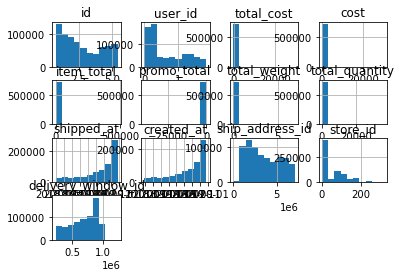

In [619]:
orders.hist();

какие-то они не показательные, сделаю далее отдельные 

## Заказы с нулевой суммой

сделать один раздел для всех маленьких заказов и функцию для вывода городов и ретейлеров 
необходимо уточнить, item_total указана за вычетом промокода или нет. Если нет, то оценить долю оч маленьких заказов после вычета промокода из суммы


In [620]:
zero_orders = orders.query('item_total == 0')
zero_orders

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
25087,2457003,777240,0.0,0.0,0,0.0,500,4,shipped,2019-09-24 13:33:58,2019-09-24 10:10:43,3520882,1,732756
81574,2828415,1112015,0.0,299.0,0,0.0,4625,13,shipped,2019-10-20 10:04:05,2019-10-18 20:58:03,4082440,2,796140
108509,1631533,416183,0.0,299.0,0,0.0,18000,18,shipped,2019-06-21 14:17:06,2019-06-21 09:52:24,2213321,3,561538
320701,5126949,1758530,98.0,249.0,0,-199.0,10950,11,shipped,2019-12-11 05:46:06,2019-12-10 20:02:23,6751812,12,943952
326495,881444,173854,0.0,299.0,0,0.0,705,3,shipped,2018-10-30 05:50:49,2018-10-29 16:01:04,1104838,14,282229
444602,2094365,674612,0.0,0.0,0,0.0,3385,15,shipped,2019-08-25 17:24:13,2019-08-25 13:26:08,2938463,70,675904
504839,3838920,1410293,199.0,199.0,0,0.0,5810,7,shipped,2019-11-11 09:12:57,2019-11-09 07:23:24,5203891,63,852220
701620,1528533,353833,99.0,149.0,0,0.0,3723,16,shipped,2019-06-01 04:41:19,2019-05-30 15:04:09,1772737,108,530572
716938,5004403,1727727,99.0,199.0,0,0.0,11771,18,shipped,2019-12-08 07:51:02,2019-12-08 03:53:15,6378487,169,932160


In [621]:
# посмотрю подробнее на магазины, куда отгружались эти заказы через delivery_window_id
delivery_window_id_list = list(zero_orders["delivery_window_id"])
#delivery_window_id_list

delivery_windows.query('id in @delivery_window_id_list')

,store_id,id,starts_at,ends_at,time_zone
7000,1,732756,2019-09-24 12:00:00.000,2019-09-24 14:00:00.000,Europe/Moscow
22365,2,796140,2019-10-20 09:00:00.000,2019-10-20 11:00:00.000,Europe/Moscow
27791,3,561538,2019-06-21 14:00:00.000,2019-06-21 16:00:00.000,Europe/Moscow
82702,12,943952,2019-12-11 05:00:00.000,2019-12-11 07:00:00.000,Europe/Moscow
83757,14,282229,2018-10-30 05:00:00.000,2018-10-30 07:00:00.000,Europe/Moscow
123983,70,675904,2019-08-25 16:00:00.000,2019-08-25 18:00:00.000,Europe/Moscow
143975,63,852220,2019-11-11 08:00:00.000,2019-11-11 10:00:00.000,Europe/Moscow
198439,108,530572,2019-06-01 04:00:00.000,2019-06-01 06:00:00.000,Asia/Omsk
203238,169,932160,2019-12-08 06:00:00.000,2019-12-08 08:00:00.000,Asia/Omsk


In [622]:
store_list = list(delivery_windows.query('id in @delivery_window_id_list')['store_id'])

stores.query('id in @store_list')
# посмотрю подробнее на адреса, куда отгружались эти заказы


,id,city,retailer_id
0,1,1,1
1,2,1,1
2,3,1,1
7,12,1,1
8,14,1,1
13,63,2,1
15,70,1,15
26,108,13,1
42,169,13,8


Обнаружены 9 заказов с нулевой стоимостью, при этом у заказов есть вес (от 5 г до 18 кг) и товары в составе (от 3 до 18 товаров). 7 таких заказов отправлены ретейлеру №1 (из них 6 - в город №1, один - в город №2), ещё два заказа отправлены в город №13 ритейлерам №8 и 15.

## Заказы меньше 100

In [623]:
very_small_orders = orders.query('item_total < 100')
very_small_orders

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
120,760832,121517,299.0,299.0,50,0.00,22877,23,shipped,2018-08-28 14:58:53,2018-08-28 04:51:25,884228,1,228293
261,766601,142290,0.0,0.0,92,-500.00,10930,15,shipped,2018-09-03 21:14:22,2018-08-30 19:40:29,905771,1,233265
465,774026,144172,0.0,0.0,16,-100.00,2016,2,shipped,2018-09-05 19:22:20,2018-09-04 08:36:45,917813,1,234916
753,784337,147039,0.0,0.0,23,0.00,4965,12,shipped,2018-09-10 18:34:31,2018-09-09 20:23:22,935687,1,239055
2446,845507,163938,0.0,299.0,41,-153.87,3605,14,shipped,2018-11-22 18:46:00,2018-10-11 09:01:19,1044653,1,309115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717044,5086086,689331,99.0,199.0,26,0.00,1605,8,shipped,2019-12-10 06:39:12,2019-12-09 21:02:19,2676113,169,941779
717321,5327853,1820090,99.0,199.0,52,-300.00,9400,15,shipped,2019-12-17 04:35:41,2019-12-15 18:09:43,6156667,169,968318
719771,5175066,1770656,99.0,199.0,60,0.00,9750,12,shipped,2019-12-12 08:21:02,2019-12-12 03:52:00,6813071,170,949582
720315,5240733,1774355,98.0,238.0,66,0.00,6215,20,shipped,2019-12-16 09:52:24,2019-12-13 13:54:11,6828921,235,965722


In [624]:
# посмотрю подробнее на магазины, куда отгружались эти заказы через delivery_window_id
delivery_window_id_list = list(very_small_orders["delivery_window_id"])
#delivery_window_id_list

delivery_windows.query('id in @delivery_window_id_list')

,store_id,id,starts_at,ends_at,time_zone
23,1,228293,2018-08-28 13:00:00.000,2018-08-28 15:00:00.000,Europe/Moscow
154,1,233265,2018-09-03 20:00:00.000,2018-09-03 22:00:00.000,Europe/Moscow
263,1,234916,2018-09-05 16:00:00.000,2018-09-05 18:00:00.000,Europe/Moscow
362,1,239055,2018-09-10 19:00:00.000,2018-09-10 21:00:00.000,Europe/Moscow
418,1,309115,2018-11-22 18:00:00.000,2018-11-22 20:00:00.000,Europe/Moscow
...,...,...,...,...,...
203255,169,941779,2019-12-10 05:00:00.000,2019-12-10 07:00:00.000,Asia/Omsk
203294,169,968318,2019-12-17 05:00:00.000,2019-12-17 07:00:00.000,Asia/Omsk
204106,170,949582,2019-12-12 07:00:00.000,2019-12-12 09:00:00.000,Asia/Omsk
204255,235,965722,2019-12-16 09:00:00.000,2019-12-16 11:00:00.000,Asia/Omsk


In [625]:
store_list = list(delivery_windows.query('id in @delivery_window_id_list')['store_id'])

very_small_orders_stores = stores.query('id in @store_list')
very_small_orders_stores.groupby('city')['id'].count()

city
1     26
2      5
5      7
7      8
8      3
10     6
13     5
Name: id, dtype: int64

In [626]:
very_small_orders_stores.groupby('retailer_id')['id'].count()

retailer_id
1     24
8     15
15    18
16     3
Name: id, dtype: int64

## Заказы меньше 500 руб

In [627]:
small_orders = orders[orders['item_total'] < 500]
small_orders

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
17,757238,60713,299.0,299.0,441,-500.0,8063,14,shipped,2018-08-27 20:02:04,2018-08-26 09:01:11,872599,1,227253
110,760249,150436,0.0,0.0,295,0.0,12000,2,shipped,2018-09-18 03:23:41,2018-08-27 17:42:33,858979,1,244884
120,760832,121517,299.0,299.0,50,0.0,22877,23,shipped,2018-08-28 14:58:53,2018-08-28 04:51:25,884228,1,228293
261,766601,142290,0.0,0.0,92,-500.0,10930,15,shipped,2018-09-03 21:14:22,2018-08-30 19:40:29,905771,1,233265
304,768294,142709,0.0,0.0,196,0.0,2137,4,shipped,2018-09-01 11:00:38,2018-08-31 17:54:58,908526,1,231599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720321,5251690,1791107,98.0,238.0,265,0.0,2982,18,shipped,2019-12-14 06:15:11,2019-12-13 18:59:03,6906269,235,958229
720324,5257341,1792347,98.0,238.0,439,0.0,3670,9,shipped,2019-12-14 07:00:14,2019-12-14 02:20:40,6914104,235,958227
720376,5336760,768668,98.0,238.0,77,0.0,15785,28,shipped,2019-12-17 10:11:31,2019-12-16 04:47:50,7015527,235,969482
720411,5397932,1785057,98.0,238.0,172,0.0,12061,25,shipped,2019-12-18 08:29:15,2019-12-17 15:22:24,6864078,235,973247


In [628]:
len(small_orders) / len(orders)

0.009118127570502739

In [629]:
small_orders.describe(include='all')

<ipython-input-629-b2b112aa106e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  small_orders.describe(include='all')
<ipython-input-629-b2b112aa106e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  small_orders.describe(include='all')


,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
count,6.569000e+03,6.569000e+03,6569.000000,6569.000000,6569.000000,6569.000000,6569.00000,6569.000000,6569,6569,6569,6.569000e+03,6569.000000,6569.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6558,6568,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shipped,2019-02-15 13:37:00,2019-09-28 09:59:08,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6568,2,2,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-26 15:42:58,2018-08-26 06:45:46,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-18 21:09:46,2019-12-18 14:28:57,NaN,NaN,NaN
mean,2.372235e+06,6.452426e+05,83.801796,214.561577,271.482417,-37.327112,9782.82935,15.630690,NaN,NaN,NaN,3.046802e+06,70.153144,633785.824479
std,1.369844e+06,5.077358e+05,90.190739,97.794380,145.822818,117.446830,12005.35280,32.270114,NaN,NaN,NaN,1.733216e+06,57.475473,218927.883334
min,7.570060e+05,4.500000e+01,0.000000,0.000000,0.000000,-2997.590000,0.00000,0.000000,NaN,NaN,NaN,2.038050e+05,1.000000,226590.000000
25%,1.234606e+06,2.291300e+05,0.000000,149.000000,146.000000,0.000000,3530.00000,8.000000,NaN,NaN,NaN,1.607047e+06,11.000000,450605.000000


In [630]:
orders[orders['item_total'] < 100]

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
120,760832,121517,299.0,299.0,50,0.00,22877,23,shipped,2018-08-28 14:58:53,2018-08-28 04:51:25,884228,1,228293
261,766601,142290,0.0,0.0,92,-500.00,10930,15,shipped,2018-09-03 21:14:22,2018-08-30 19:40:29,905771,1,233265
465,774026,144172,0.0,0.0,16,-100.00,2016,2,shipped,2018-09-05 19:22:20,2018-09-04 08:36:45,917813,1,234916
753,784337,147039,0.0,0.0,23,0.00,4965,12,shipped,2018-09-10 18:34:31,2018-09-09 20:23:22,935687,1,239055
2446,845507,163938,0.0,299.0,41,-153.87,3605,14,shipped,2018-11-22 18:46:00,2018-10-11 09:01:19,1044653,1,309115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717044,5086086,689331,99.0,199.0,26,0.00,1605,8,shipped,2019-12-10 06:39:12,2019-12-09 21:02:19,2676113,169,941779
717321,5327853,1820090,99.0,199.0,52,-300.00,9400,15,shipped,2019-12-17 04:35:41,2019-12-15 18:09:43,6156667,169,968318
719771,5175066,1770656,99.0,199.0,60,0.00,9750,12,shipped,2019-12-12 08:21:02,2019-12-12 03:52:00,6813071,170,949582
720315,5240733,1774355,98.0,238.0,66,0.00,6215,20,shipped,2019-12-16 09:52:24,2019-12-13 13:54:11,6828921,235,965722


## промо-коды

In [631]:
promos = orders[orders['promo_total'] != 0]
promos.describe(include='all', percentiles=[.05,.5,.95])

<ipython-input-631-014b0410970b>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  promos.describe(include='all', percentiles=[.05,.5,.95])
<ipython-input-631-014b0410970b>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  promos.describe(include='all', percentiles=[.05,.5,.95])


,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id,delivery_window_id
count,9.783800e+04,9.783800e+04,97838.000000,97838.000000,97838.000000,97838.000000,97838.000000,97838.000000,97838,97838,97838,9.783800e+04,97838.000000,97838.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,96995,97535,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shipped,2019-02-04 13:50:00,2019-12-06 06:16:17,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97833,4,2,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-26 12:13:16,2018-08-26 03:36:34,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-18 23:47:42,2019-12-18 17:32:10,NaN,NaN,NaN
mean,2.539495e+06,6.525068e+05,133.756782,238.602629,4538.542407,-378.738509,23516.937172,40.771060,NaN,NaN,NaN,3.215368e+06,55.510047,665414.089198
std,1.399454e+06,5.284596e+05,126.658894,128.220049,3640.524798,529.283779,22789.242154,49.730233,NaN,NaN,NaN,1.758219e+06,57.597518,212323.057424
min,7.569330e+05,4.500000e+01,0.000000,0.000000,0.000000,-39899.300000,0.000000,1.000000,NaN,NaN,NaN,4.622400e+04,1.000000,226459.000000
5%,8.441362e+05,7.744215e+04,0.000000,0.000000,1361.000000,-916.024000,4252.850000,8.000000,NaN,NaN,NaN,9.919997e+05,1.000000,267836.550000


In [632]:
# доля заказов с промокодами от общего числа заказов
len(promos)/len(orders)

0.13580443982993562

In [633]:
#общая доля скидки от общей суммы заказов со скидками

promos_sum = promos['promo_total'].sum() * (-1)
orders_with_promos_sum = promos['item_total'].sum()
promos_sum/orders_with_promos_sum

0.08344937108098929

In [634]:
promos.columns

Index(['id', 'user_id', 'total_cost', 'cost', 'item_total', 'promo_total',
       'total_weight', 'total_quantity', 'state', 'shipped_at', 'created_at',
       'ship_address_id', 'store_id', 'delivery_window_id'],
      dtype='object')

In [635]:
# найду долю скидки в каждом заказе
promos_share = promos[['id', 'total_cost', 'cost', 'item_total', 'promo_total','state']]
promos_share['share'] = promos_share['promo_total']/promos_share['item_total']*(-1)
promos_share.describe(include='all')

<ipython-input-635-48a6d019512a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promos_share['share'] = promos_share['promo_total']/promos_share['item_total']*(-1)


,id,total_cost,cost,item_total,promo_total,state,share
count,9.783800e+04,97838.000000,97838.000000,97838.000000,97838.000000,97838,9.783800e+04
unique,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,shipped,NaN
freq,NaN,NaN,NaN,NaN,NaN,97833,NaN
mean,2.539495e+06,133.756782,238.602629,4538.542407,-378.738509,NaN,inf
std,1.399454e+06,126.658894,128.220049,3640.524798,529.283779,NaN,NaN
min,7.569330e+05,0.000000,0.000000,0.000000,-39899.300000,NaN,1.290156e-04
25%,1.472602e+06,0.000000,199.000000,2705.000000,-450.000000,NaN,4.900748e-02
50%,2.097904e+06,99.000000,246.000000,3855.000000,-250.000000,NaN,7.492470e-02
75%,3.540739e+06,199.000000,299.000000,5463.000000,-200.000000,NaN,1.146313e-01


In [636]:
promos_share.sort_values(by='share').tail(10)

,id,total_cost,cost,item_total,promo_total,state,share
323815,807540,0.0,0.0,12,-500.0,shipped,41.666667
501119,1844345,98.0,238.0,7,-299.0,shipped,42.714286
588277,999159,0.0,149.0,11,-500.0,shipped,45.454545
501382,1936017,98.0,238.0,8,-399.0,shipped,49.875000
664904,2584279,0.0,149.0,5,-300.0,shipped,60.000000
699802,5360077,158.0,238.0,4,-250.0,shipped,62.500000
509070,1905069,0.0,0.0,5,-399.0,shipped,79.800000
503064,2542938,0.0,199.0,1,-230.0,shipped,230.000000
45664,792088,0.0,0.0,1,-400.0,shipped,400.000000
320701,5126949,98.0,249.0,0,-199.0,shipped,inf


In [637]:
clean_orders.groupby('created_month')['promo_total'].sum()

created_month
2018-08-01    -593346.12
2018-09-01   -2131179.25
2018-10-01   -1902485.11
2018-11-01   -1241410.54
2018-12-01   -1475441.17
2019-01-01   -1272427.03
2019-02-01    -866472.41
2019-03-01    -743903.34
2019-04-01   -1147602.05
2019-05-01   -1695181.74
2019-06-01   -2097087.26
2019-07-01   -2930789.37
2019-08-01   -3283178.72
2019-09-01   -3961622.79
2019-10-01   -3473118.69
2019-11-01   -4459747.84
2019-12-01   -3288573.01
Name: promo_total, dtype: float64

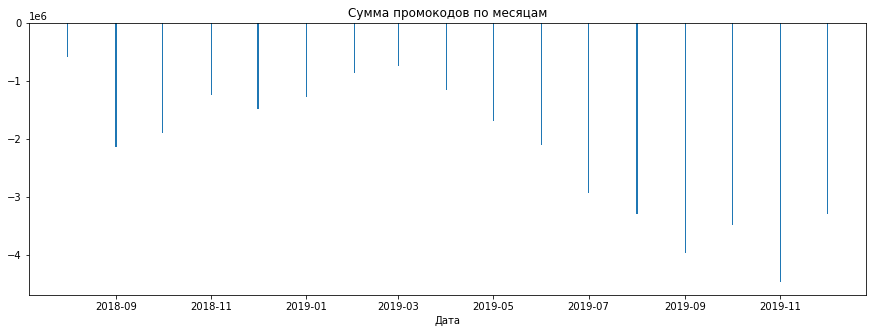

In [748]:
sub_df = clean_orders.groupby('created_month')['promo_total'].sum()
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.bar(sub_df.index, sub_df.values)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Сумма промокодов по месяцам')
plt.xlabel('Дата')
plt.ylabel('')
plt.show()

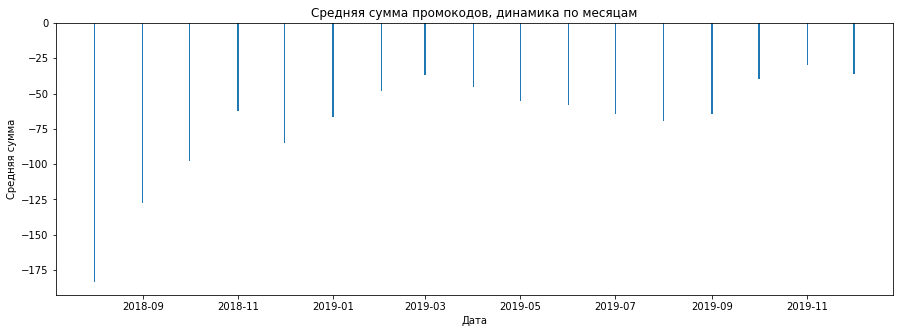

In [639]:
sub_df = clean_orders.groupby('created_month')['promo_total'].mean()
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.bar(sub_df.index, sub_df.values)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Средняя сумма промокодов, динамика по месяцам')
plt.xlabel('Дата')
plt.ylabel('Средняя сумма')
plt.show()

Хотя общая сумма промокодов растет, но средняя сумма промокодов уменьшилась, а самая минимальная она в пиковый месяц ноябрь. получается, что промокоды не коррелируют с объемом продаж.

## Динамика показателей во времени

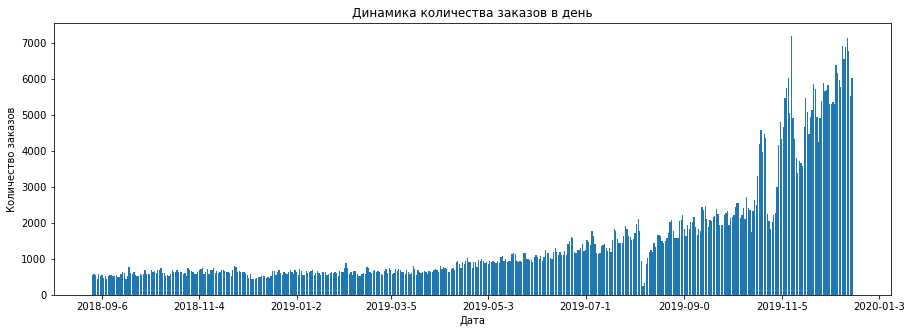

In [721]:
sub_df = clean_orders.groupby('created_date')['id'].count()
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.bar(sub_df.index, sub_df.values)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%w'))
plt.title('Динамика количества заказов в день')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

выделю период в районе августа 2019 года, чтобы посмотреть, что там за провал в количестве заказов

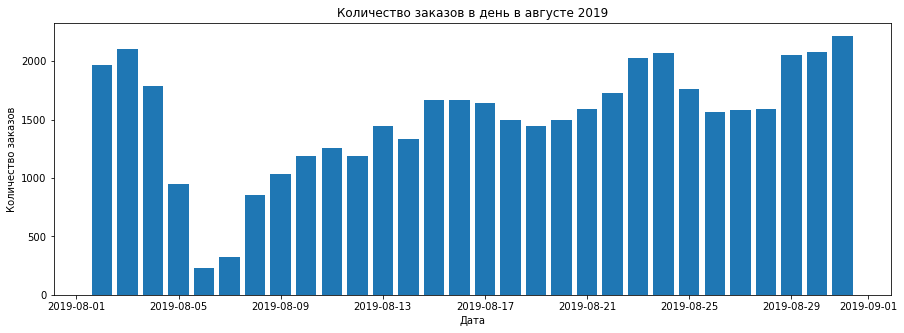

In [747]:
orders_per_date = clean_orders.groupby('created_date')['id'].count().reset_index()
orders_per_date['created_date'] = pd.to_datetime(orders_per_date['created_date'])
selection = orders_per_date.query('(created_date > "2019-08-01") and (created_date < "2019-09-01")') 

#selection.plot(x='created_date',y='id', kind='bar')
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.bar(selection['created_date'], selection['id'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Количество заказов в день в августе 2019')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

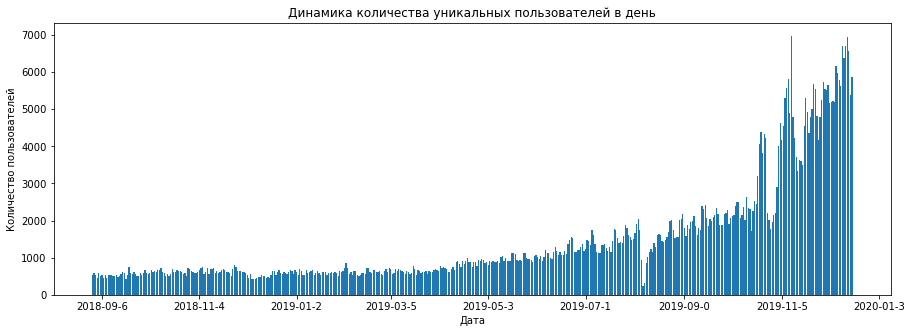

In [722]:
sub_df = clean_orders.groupby('created_date')['user_id'].nunique()
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.bar(sub_df.index, sub_df.values)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%w'))
plt.title('Динамика количества уникальных пользователей в день')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.show()

In [644]:
clean_orders.head()

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,shipped_at,created_at,ship_address_id,store_id,delivery_window_id,created_date,created_month,weekday,week_number,year
0,756927,139676,0.0,0.0,5015,0.0,37708,39,2018-08-26 15:01:42,2018-08-26 02:06:55,888330,1,226459,2018-08-26,2018-08-01,6,34,2018
1,756963,139682,0.0,0.0,7096,0.0,49435,71,2018-08-26 16:28:41,2018-08-26 05:43:20,888394,1,226460,2018-08-26,2018-08-01,6,34,2018
2,756983,63967,299.0,299.0,2724,-250.0,11590,32,2018-08-26 15:09:11,2018-08-26 06:12:13,888420,1,226459,2018-08-26,2018-08-01,6,34,2018
3,756985,139687,0.0,0.0,3471,0.0,9915,13,2018-08-26 18:57:01,2018-08-26 06:13:59,888422,1,226462,2018-08-26,2018-08-01,6,34,2018
4,757066,119006,299.0,299.0,1254,0.0,15022,24,2018-08-26 13:46:48,2018-08-26 07:40:58,870688,1,226458,2018-08-26,2018-08-01,6,34,2018


###  дни недели

In [718]:
dofw_indicators = clean_orders.groupby('weekday').agg({
    'id':'count', 
    'user_id':'nunique', 
    'item_total':'mean', 
    'total_weight':'mean', 
    'total_quantity':'mean'}).reset_index()
dofw_indicators.columns=(['weekday','number_orders','unique_users',
                          'avg_order_sum' ,'avg_order_weight','avg_items_in_order'])
dofw_indicators

,weekday,number_orders,unique_users,avg_order_sum,avg_order_weight,avg_items_in_order
0,0,94720,63790,5018.772572,25312.766617,44.363450
1,1,97307,66812,5054.480510,25146.050726,44.729115
2,2,94792,65054,5008.806091,24782.291976,43.336917
3,3,107756,71528,5014.369808,25133.758120,44.003675
4,4,108005,71518,4979.966261,24764.574362,43.663256
5,5,106171,70116,4792.394317,24003.305573,41.076330
6,6,98884,67340,4764.155900,23707.096345,40.386716


In [720]:
dofw_indicators.corr()

,weekday,number_orders,unique_users,avg_order_sum,avg_order_weight,avg_items_in_order
weekday,1.000000,0.556574,0.590964,-0.861323,-0.898179,-0.869410
number_orders,0.556574,1.000000,0.982513,-0.224875,-0.186504,-0.166308
unique_users,0.590964,0.982513,1.000000,-0.212075,-0.212267,-0.169044
avg_order_sum,-0.861323,-0.224875,-0.212075,1.000000,0.964856,0.984279
avg_order_weight,-0.898179,-0.186504,-0.212267,0.964856,1.000000,0.982754
avg_items_in_order,-0.869410,-0.166308,-0.169044,0.984279,0.982754,1.000000


Есть выраженная корреляция между днем недели и такими показателями как средняя сумма заказа, средний вес заказа и среднее количество позиций в заказе, и заметная корреляция с количеством заказов. Не знаю, как эта информация может быть полезна бизнесу. Возможно, полезно для планирования нагрузки на курьеров.

<AxesSubplot:>

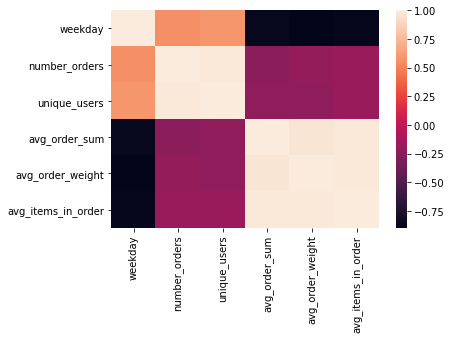

In [719]:
sns.heatmap(dofw_indicators.corr())

как будто бы по воскресеньям среднее количество продуктов в заказе поменьше. можно проверить стат.значимость, что это нам даст?
посмотрю динамику количества продуктов во времени

### среднее кол-во продуктов в заказе

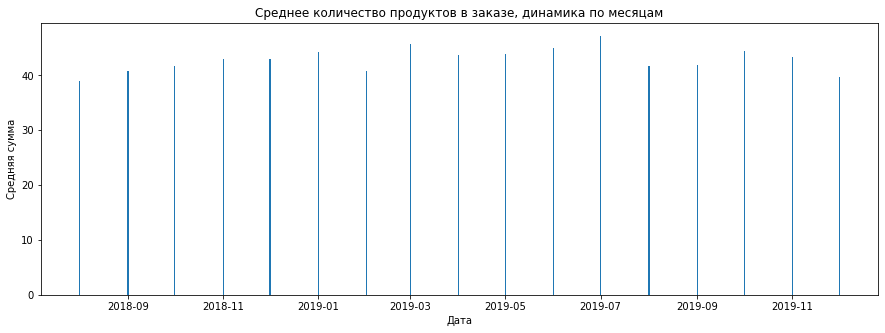

In [646]:
sub_df = clean_orders.groupby('created_month')['total_quantity'].mean()
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.bar(sub_df.index, sub_df.values)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Среднее количество продуктов в заказе, динамика по месяцам')
plt.xlabel('Дата')
plt.ylabel('Средняя сумма')
plt.show()

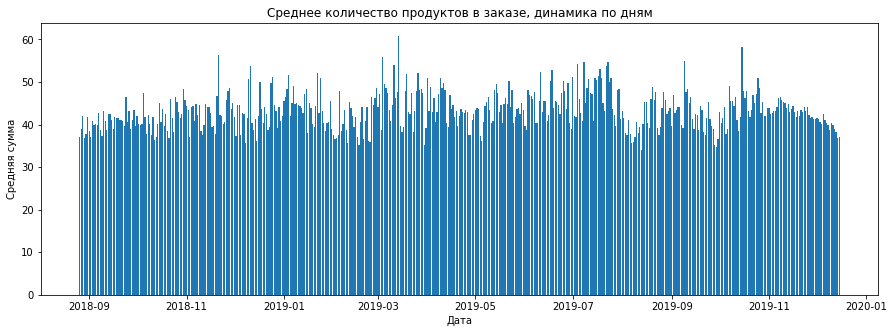

In [647]:
sub_df = clean_orders.groupby('created_date')['total_quantity'].mean()
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.bar(sub_df.index, sub_df.values)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Среднее количество продуктов в заказе, динамика по дням')
plt.xlabel('Дата')
plt.ylabel('Средняя сумма')
plt.show()

## Заказы на пользователя

In [649]:
clean_orders.head()

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,shipped_at,created_at,ship_address_id,store_id,delivery_window_id,created_date,created_month,weekday,week_number,year
0,756927,139676,0.0,0.0,5015,0.0,37708,39,2018-08-26 15:01:42,2018-08-26 02:06:55,888330,1,226459,2018-08-26,2018-08-01,6,34,2018
1,756963,139682,0.0,0.0,7096,0.0,49435,71,2018-08-26 16:28:41,2018-08-26 05:43:20,888394,1,226460,2018-08-26,2018-08-01,6,34,2018
2,756983,63967,299.0,299.0,2724,-250.0,11590,32,2018-08-26 15:09:11,2018-08-26 06:12:13,888420,1,226459,2018-08-26,2018-08-01,6,34,2018
3,756985,139687,0.0,0.0,3471,0.0,9915,13,2018-08-26 18:57:01,2018-08-26 06:13:59,888422,1,226462,2018-08-26,2018-08-01,6,34,2018
4,757066,119006,299.0,299.0,1254,0.0,15022,24,2018-08-26 13:46:48,2018-08-26 07:40:58,870688,1,226458,2018-08-26,2018-08-01,6,34,2018


In [650]:
clean_orders_monthly = clean_orders.groupby('created_month').agg({
    'user_id':'nunique', 
    'id':'count', 
    'total_cost':('sum','mean'),
    'total_quantity':'mean'})

clean_orders_monthly.columns = clean_orders_monthly.columns.map('_'.join)
clean_orders_monthly['order_per_user'] = clean_orders_monthly['id_count']/clean_orders_monthly['user_id_nunique']

In [651]:
clean_orders_monthly

,user_id_nunique,id_count,total_cost_sum,total_cost_mean,total_quantity_mean,order_per_user
created_month,,,,,,
2018-08-01,3038,3235,681354.00,210.619474,39.065842,1.064845
2018-09-01,11944,16704,3258907.67,195.097442,40.840338,1.398526
2018-10-01,13405,19423,3815910.73,196.463509,41.679916,1.448937
2018-11-01,13596,19808,3814424.80,192.569911,42.943306,1.456899
2018-12-01,12039,17278,3244274.98,187.769127,42.943686,1.435169
2019-01-01,13238,19188,3694155.83,192.524277,44.348395,1.449464
2019-02-01,12520,17966,3417212.00,190.204386,40.803573,1.434984
2019-03-01,13242,20071,3852657.80,191.951462,45.812964,1.515708
2019-04-01,17255,25132,4423395.00,176.006486,43.759032,1.456505


Интересно, что количество заказов на пользователя в месяц мало изменилось с конца 2018 года. Но некоторое повышение произошло как раз в районе середины 2019 года и максимальной величины этот показатель достиг именно в месяцы пикового роста - ноябрь 2020 года. 

Среднее количество продуктов в заказе тоже существенно не поменялось, не вижу никакого выраженного тренда.

## Когорты по дате первого заказа

Выделю дату первого заказа для каждого пользователя и сформирую когорты по этому признаку.

In [654]:
first_order_date = clean_orders.groupby('user_id')['created_month'].first().reset_index()
first_order_date.columns = ['user_id','first_order_month']
first_order_date

,user_id,first_order_month
0,31,2019-01-01
1,45,2018-09-01
2,63,2018-09-01
3,167,2018-08-01
4,176,2019-03-01
...,...,...
253785,1835256,2019-12-01
253786,1835524,2019-12-01
253787,1835595,2019-12-01
253788,1835828,2019-12-01


In [655]:
clean_orders = clean_orders.merge(first_order_date, on = 'user_id', how='left')

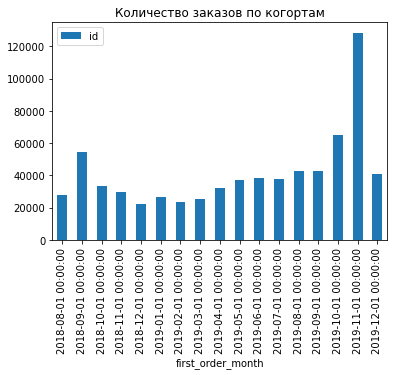

In [702]:
clean_orders.groupby('first_order_month').agg({'id':'count'}).plot.bar();
plt.title('Количество заказов по когортам')
plt.show()

### заказы на пользователя по когортам

In [712]:
cohorts = clean_orders.groupby('first_order_month').agg({'user_id':'nunique', 'id':'count'})
cohorts['order_per_user'] = cohorts['id']/cohorts['user_id']
cohorts

,user_id,id,order_per_user
first_order_month,,,
2018-08-01,2820,27876,9.885106
2018-09-01,10265,54313,5.291086
2018-10-01,8957,33577,3.748688
2018-11-01,8243,29547,3.584496
2018-12-01,6753,22301,3.302384
2019-01-01,7415,26356,3.554417
2019-02-01,6543,23551,3.599419
2019-03-01,6445,25455,3.949573
2019-04-01,9044,32374,3.579611


## Cancellations

In [658]:
cancellations.head()

,order_id,item_id,state
0,480443,5333890,canceled
1,480443,5333777,canceled
2,480443,5334118,canceled
3,480452,5333731,canceled
4,480452,5333727,canceled


хочу посмотреть есть ли зависимость между количеством позиций в заказах и отменами (предположение: чаще отменяют заказы с маленьким количеством продуктов).

In [659]:
cancellations['state'].value_counts()

canceled    1441605
Name: state, dtype: int64

In [660]:
#количество позиций в отмененных заказах
canc_grouped = cancellations.groupby('order_id')['item_id'].nunique().reset_index()

In [661]:
canc_quantity = canc_grouped.groupby('item_id')['order_id'].count().reset_index()

In [662]:
canc_quantity

,item_id,order_id
0,1,178924
1,2,113462
2,3,70697
3,4,44339
4,5,28239
...,...,...
65,86,1
66,88,1
67,95,1
68,97,1


<AxesSubplot:xlabel='item_id'>

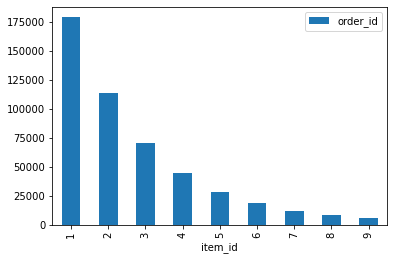

In [663]:
canc_quantity.query('item_id < 10').plot.bar(y='order_id',x='item_id')

впрочем это реестр отмен именно продуктов, а не заказов в целом, так что логично, что чаще всего отменяется один продукт, и это не значит, что был отменен весь заказ.

In [664]:
cancellations.groupby('item_id')['item_id'].count().mean()

1.0

In [665]:
cancellations['item_id'].nunique()

1441605

In [666]:
cancellations['order_id'].nunique()

493995

В таблице с отменами все id продуктов разные, хотя не может быть, чтобы каждый продукт отменили только по одному разу и больше никогда с продуктом такого не случалось. Возможно, тут какой-то динамический  id продукта, который присваивается при помещении в корзину или при подтверждении заказа. Было бы полезно иметь статистику по постоянным id товаров, выявлять конкретные товары, по которым есть проблемы с доступностью и работать с поставщиками для улучшения доступности ассортимента, или выявлять "рискованных" поставщиков и работать с альтернативными.

In [667]:
#есть ли пересечения в номерах заказов между таблицами orders и cancellations
set(orders['id']).intersection(set(cancellations['order_id']))

{1048576,
 3145731,
 1048583,
 4194312,
 1048586,
 5242891,
 1048587,
 5242899,
 1048596,
 3145749,
 3145748,
 1048602,
 5242907,
 4194331,
 4194341,
 1048614,
 1048617,
 2097194,
 4194348,
 2097198,
 4194353,
 3145778,
 1048628,
 4194357,
 2097207,
 4194360,
 3145785,
 5242940,
 1048639,
 2097215,
 1048640,
 4194368,
 1048643,
 1048644,
 5242946,
 1048647,
 2097224,
 2097225,
 3145801,
 3145805,
 1048653,
 2097230,
 5242960,
 5242961,
 2097236,
 4194390,
 1048662,
 5242969,
 5242970,
 1048667,
 2097244,
 2097246,
 5242980,
 5242981,
 2097253,
 2097258,
 3145834,
 5242991,
 2097264,
 1048689,
 3145842,
 5242995,
 1048692,
 1048693,
 4194424,
 4194425,
 2097273,
 5243002,
 1048699,
 5243004,
 4194430,
 5243006,
 1048707,
 5243012,
 4194436,
 4194435,
 5243016,
 1048713,
 5243018,
 5243017,
 1048718,
 5243024,
 1048721,
 1048722,
 5243027,
 2097298,
 4194453,
 5243030,
 1048727,
 3145887,
 1048737,
 5243042,
 5243043,
 3145892,
 1048741,
 5243046,
 5243047,
 5243045,
 4194469,
 5243049,


У нас есть пересечения между таблицами отмен и заказов, посмотрим, что тут можно вытащить:

In [668]:
clean_orders['id'].nunique()

707635

In [669]:
clean_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707635 entries, 0 to 707634
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  707635 non-null  int64         
 1   user_id             707635 non-null  int64         
 2   total_cost          707635 non-null  float64       
 3   cost                707635 non-null  float64       
 4   item_total          707635 non-null  int64         
 5   promo_total         707635 non-null  float64       
 6   total_weight        707635 non-null  int64         
 7   total_quantity      707635 non-null  int64         
 8   shipped_at          707635 non-null  datetime64[ns]
 9   created_at          707635 non-null  datetime64[ns]
 10  ship_address_id     707635 non-null  int64         
 11  store_id            707635 non-null  int64         
 12  delivery_window_id  707635 non-null  int64         
 13  created_date        707635 no

In [681]:
cancellations_grouped_by_order = cancellations.groupby('order_id')['item_id'].count().reset_index()
cancellations_grouped_by_order.columns = ['order_id','cancelled_items']
cancellations_grouped_by_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493995 entries, 0 to 493994
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   order_id         493995 non-null  int64
 1   cancelled_items  493995 non-null  int64
dtypes: int64(2)
memory usage: 7.5 MB


In [682]:
# внесу отметку об отменах в общую таблицу с заказами
clean_orders_with_c = clean_orders.merge(cancellations_grouped_by_order, 
                                                     left_on='id',right_on='order_id',how='left')
clean_orders_with_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707635 entries, 0 to 707634
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  707635 non-null  int64         
 1   user_id             707635 non-null  int64         
 2   total_cost          707635 non-null  float64       
 3   cost                707635 non-null  float64       
 4   item_total          707635 non-null  int64         
 5   promo_total         707635 non-null  float64       
 6   total_weight        707635 non-null  int64         
 7   total_quantity      707635 non-null  int64         
 8   shipped_at          707635 non-null  datetime64[ns]
 9   created_at          707635 non-null  datetime64[ns]
 10  ship_address_id     707635 non-null  int64         
 11  store_id            707635 non-null  int64         
 12  delivery_window_id  707635 non-null  int64         
 13  created_date        707635 no

In [685]:
clean_orders_with_c['cancelled_items'].fillna(0, inplace=True)

In [686]:
clean_orders_with_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707635 entries, 0 to 707634
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  707635 non-null  int64         
 1   user_id             707635 non-null  int64         
 2   total_cost          707635 non-null  float64       
 3   cost                707635 non-null  float64       
 4   item_total          707635 non-null  int64         
 5   promo_total         707635 non-null  float64       
 6   total_weight        707635 non-null  int64         
 7   total_quantity      707635 non-null  int64         
 8   shipped_at          707635 non-null  datetime64[ns]
 9   created_at          707635 non-null  datetime64[ns]
 10  ship_address_id     707635 non-null  int64         
 11  store_id            707635 non-null  int64         
 12  delivery_window_id  707635 non-null  int64         
 13  created_date        707635 no

In [688]:
stores_with_cancels = clean_orders_with_c.groupby('store_id').agg(
    {'item_total':'sum','cancelled_items':"sum"})
stores_with_cancels['ratio'] = stores_with_cancels['cancelled_items']/stores_with_cancels['item_total']

### Магазины: рейтинг по коэффициенту отмены

In [690]:
stores_with_cancels.sort_values(by='ratio', ascending=False)

,item_total,cancelled_items,ratio
store_id,,,
128,23522761,20039.0,0.000852
238,6000192,4905.0,0.000817
258,1397945,1081.0,0.000773
257,1496055,1077.0,0.000720
57,1183330,851.0,0.000719
...,...,...,...
112,3125971,806.0,0.000258
12,285425822,72466.0,0.000254
113,2276198,549.0,0.000241


In [691]:
clean_orders_with_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707635 entries, 0 to 707634
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  707635 non-null  int64         
 1   user_id             707635 non-null  int64         
 2   total_cost          707635 non-null  float64       
 3   cost                707635 non-null  float64       
 4   item_total          707635 non-null  int64         
 5   promo_total         707635 non-null  float64       
 6   total_weight        707635 non-null  int64         
 7   total_quantity      707635 non-null  int64         
 8   shipped_at          707635 non-null  datetime64[ns]
 9   created_at          707635 non-null  datetime64[ns]
 10  ship_address_id     707635 non-null  int64         
 11  store_id            707635 non-null  int64         
 12  delivery_window_id  707635 non-null  int64         
 13  created_date        707635 no

In [694]:
stores_cancellations_dynamics = clean_orders_with_c.pivot_table(index=('store_id','created_month'), 
                                values=('item_total', 'cancelled_items'),
                                aggfunc='sum').reset_index()
stores_cancellations_dynamics.columns

Index(['store_id', 'created_month', 'cancelled_items', 'item_total'], dtype='object')

In [695]:
stores_cancellations_dynamics['ratio'] = (stores_cancellations_dynamics['cancelled_items']
                                          /stores_cancellations_dynamics['item_total'])

In [696]:
stores_cancellations_dynamics

,store_id,created_month,cancelled_items,item_total,ratio
0,1,2018-08-01,778.0,1503677,0.000517
1,1,2018-09-01,3444.0,7983428,0.000431
2,1,2018-10-01,3574.0,8862769,0.000403
3,1,2018-11-01,2299.0,8598614,0.000267
4,1,2018-12-01,2232.0,7171263,0.000311
...,...,...,...,...,...
516,258,2019-12-01,1081.0,1397945,0.000773
517,259,2019-12-01,271.0,597156,0.000454
518,260,2019-12-01,910.0,1531352,0.000594
519,261,2019-12-01,785.0,1544465,0.000508


<a id='link1'>  </a>

**Динамика рейтинга отмены по каждому магазину**

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


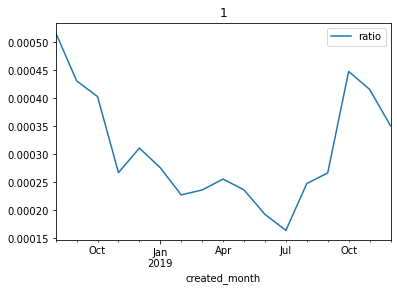

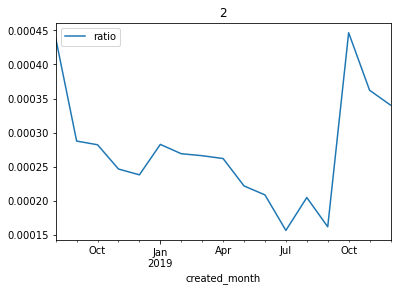

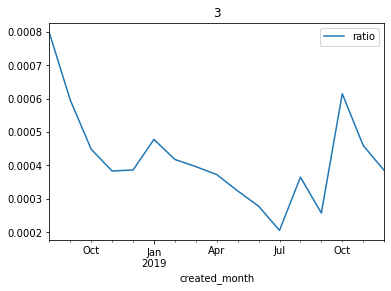

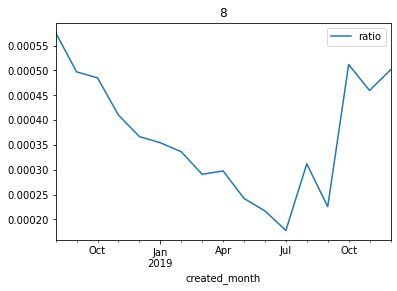

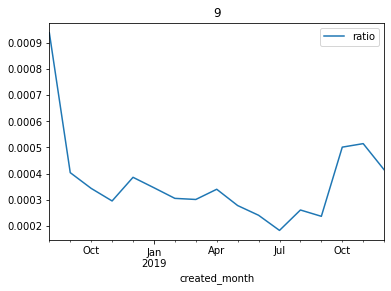

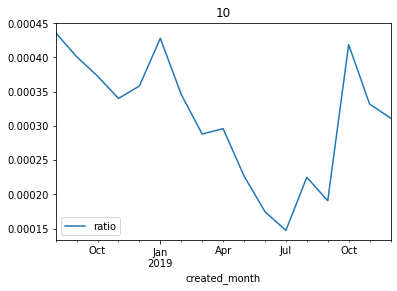

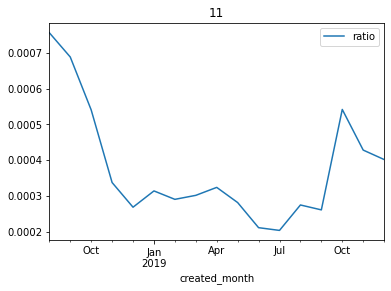

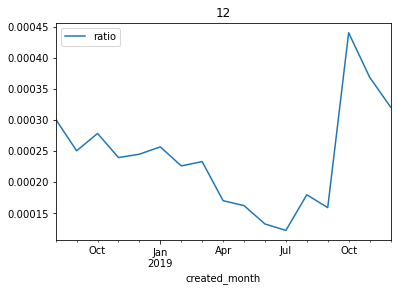

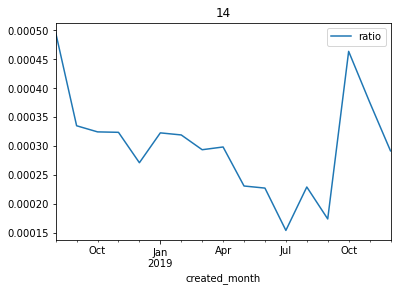

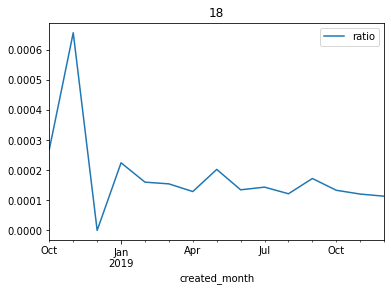

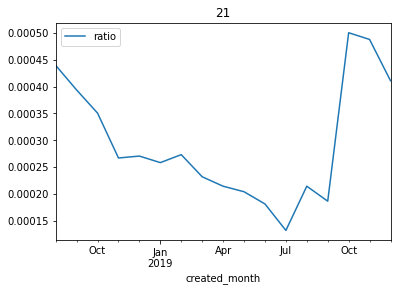

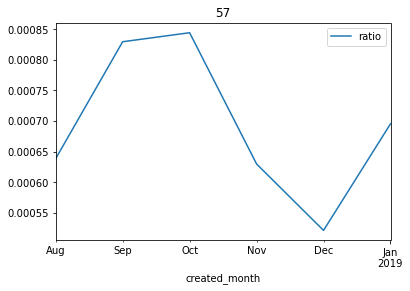

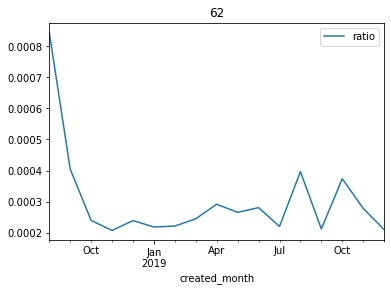

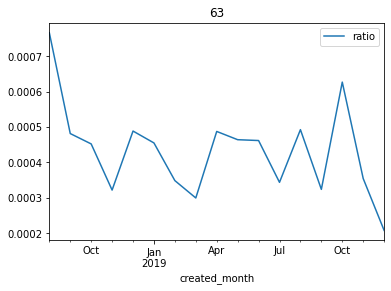

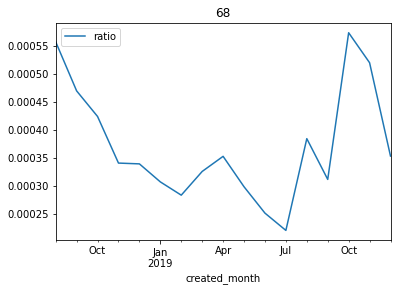

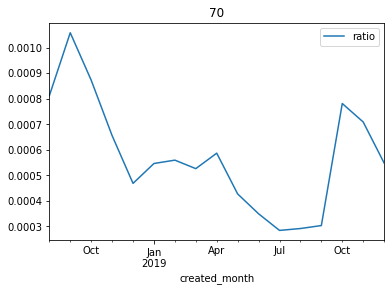

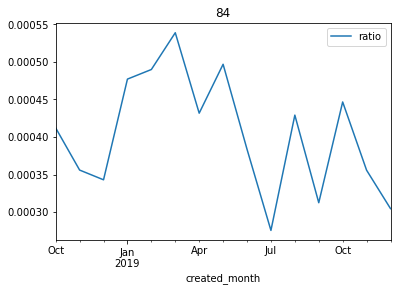

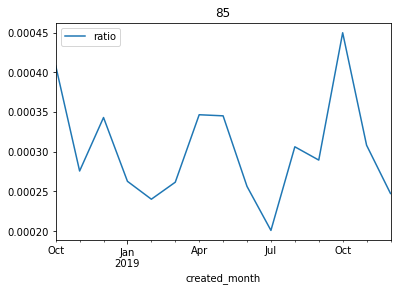

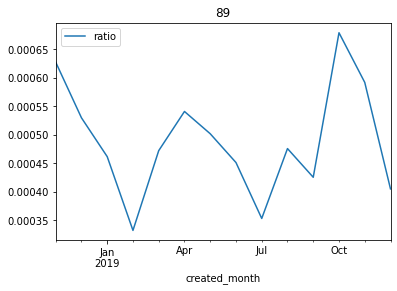

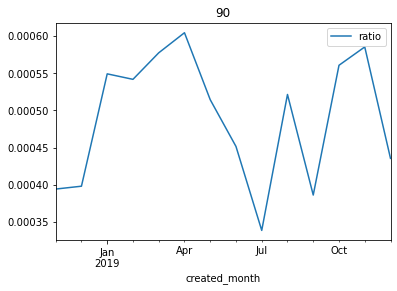

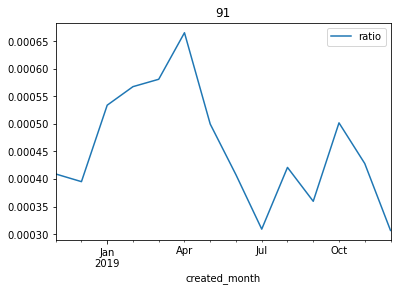

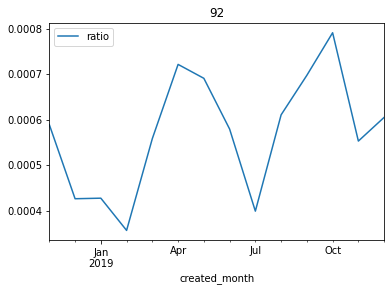

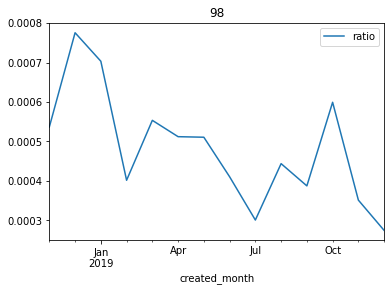

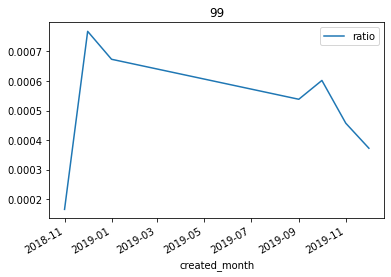

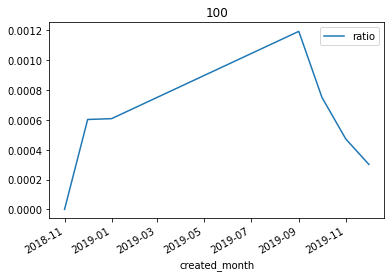

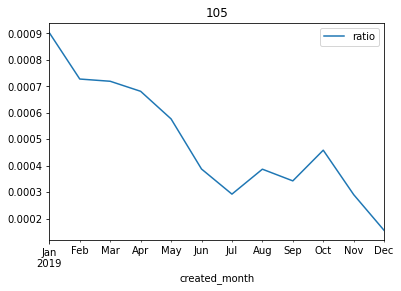

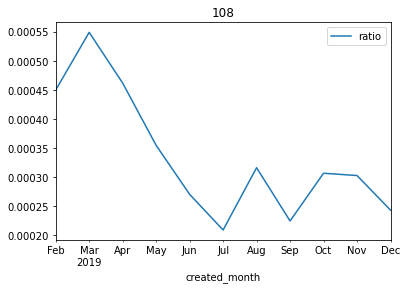

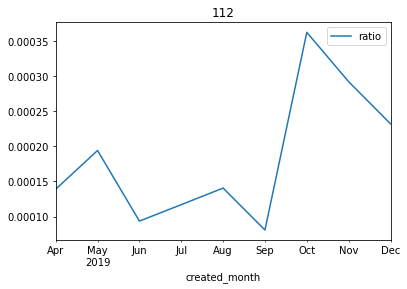

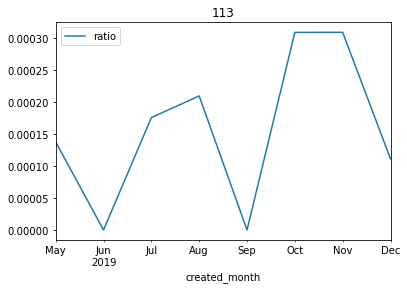

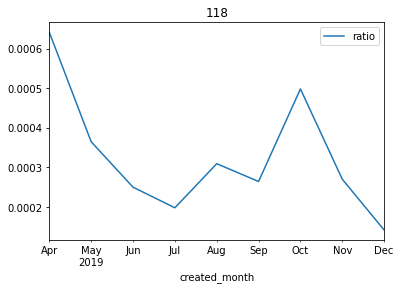

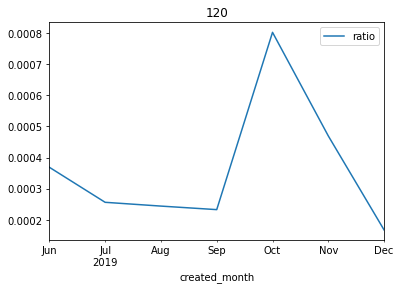

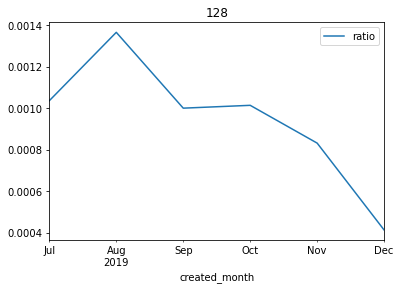

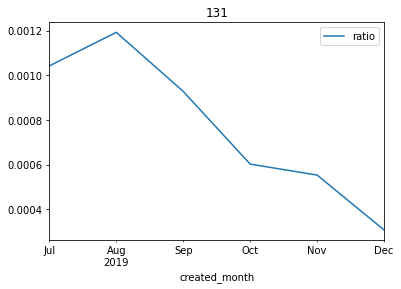

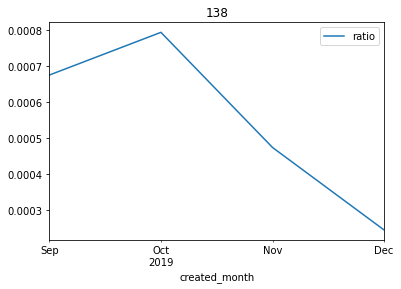

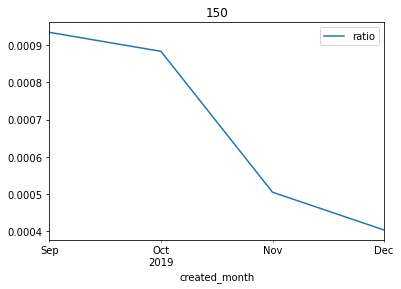

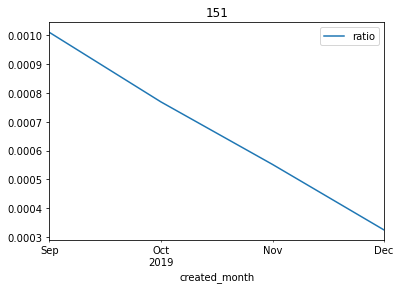

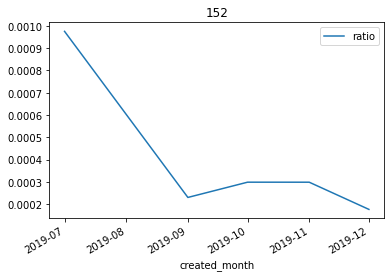

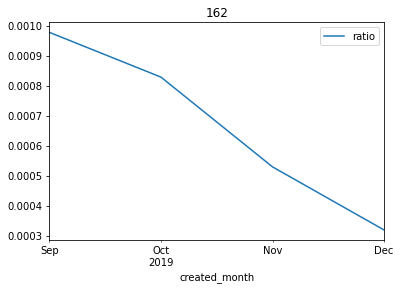

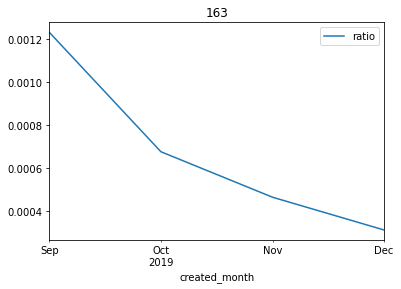

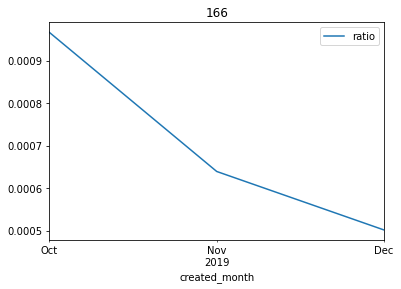

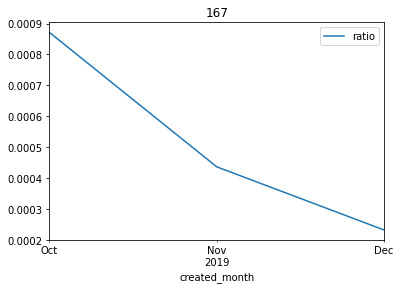

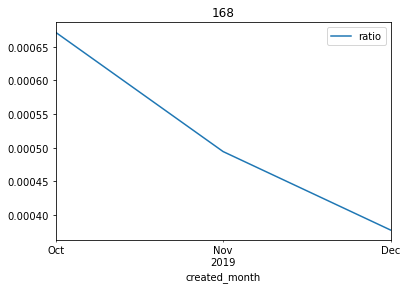

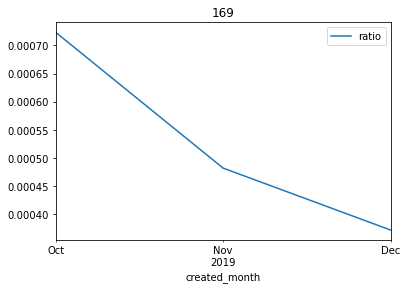

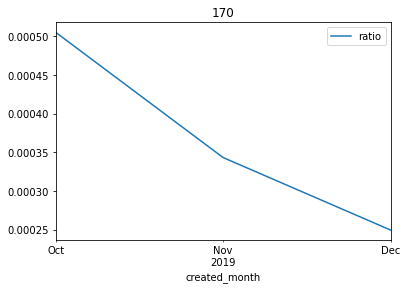

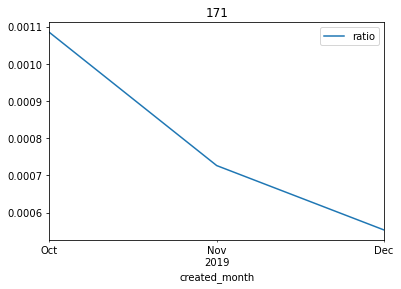

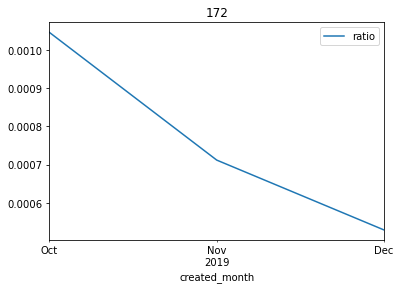

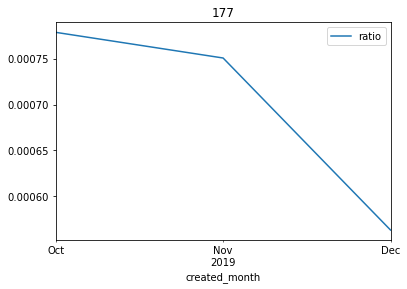

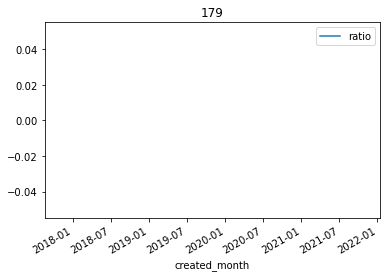

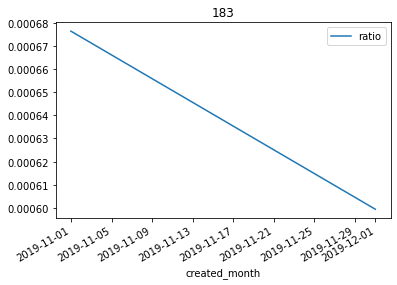

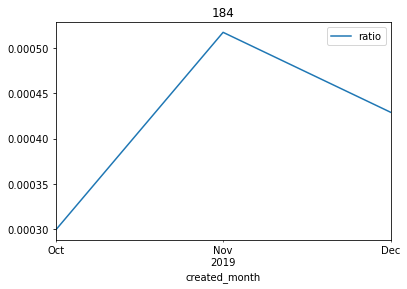

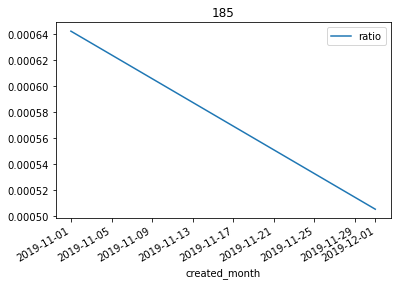

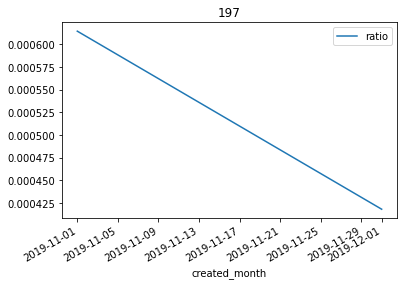

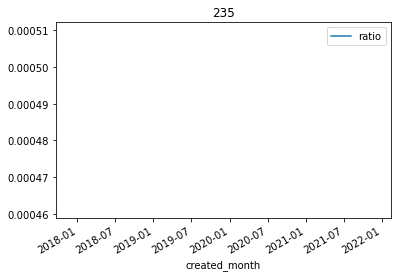

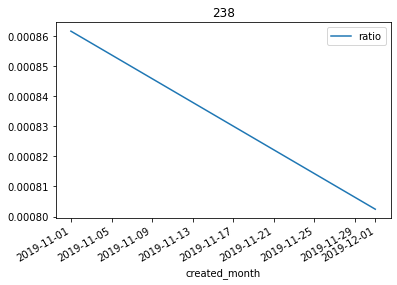

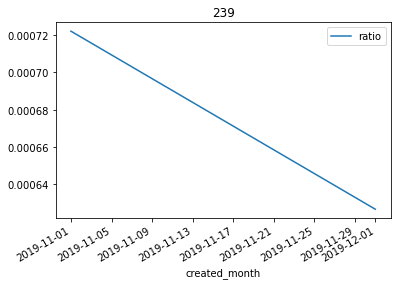

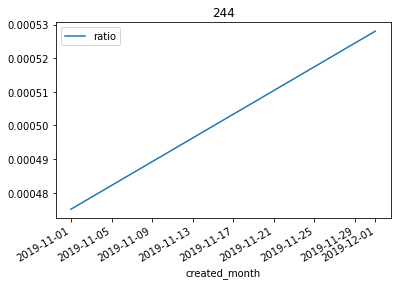

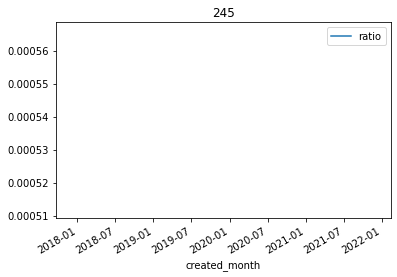

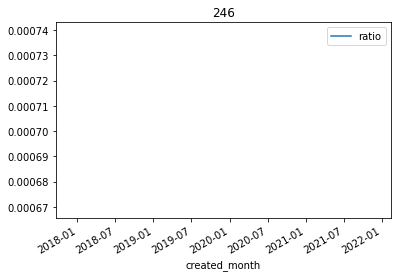

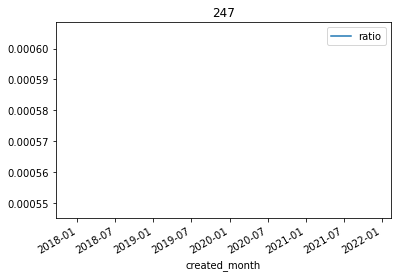

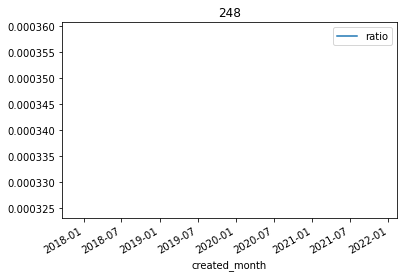

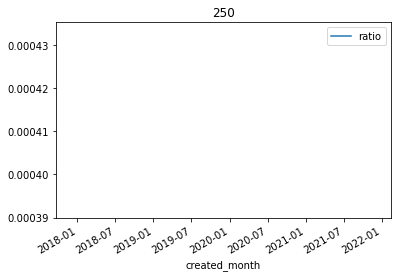

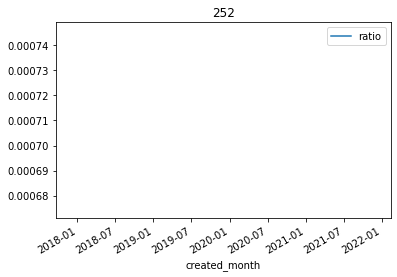

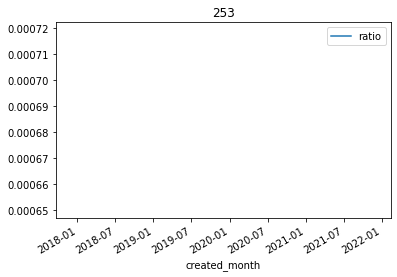

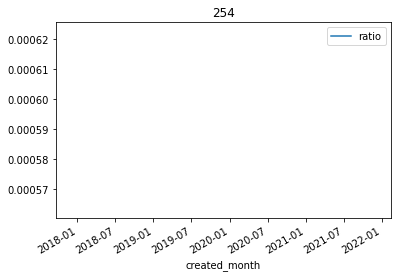

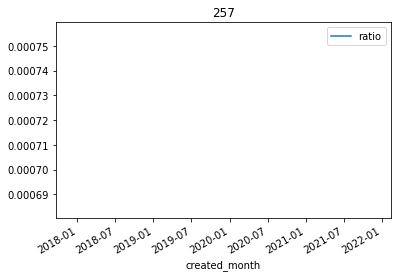

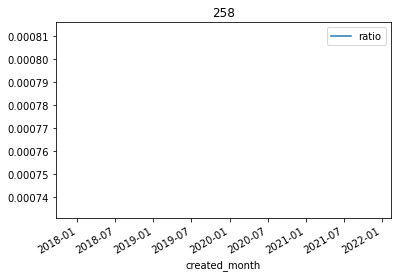

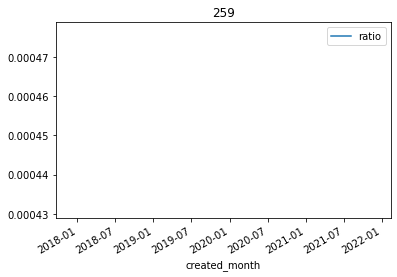

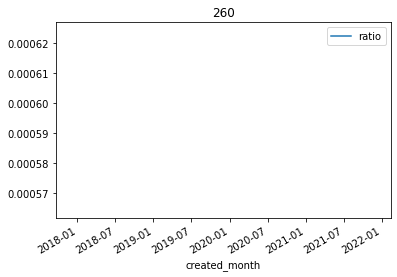

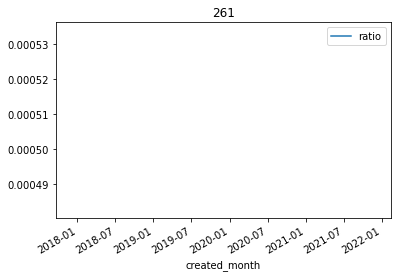

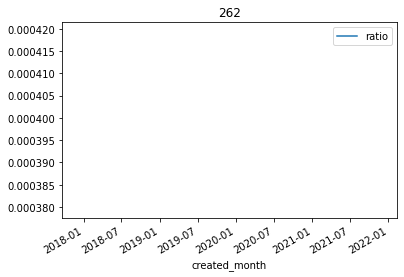

In [701]:
for store, group_data in stores_cancellations_dynamics.groupby('store_id'):
    group_data.plot(y='ratio', x='created_month', title=store, kind='line')

## Корреляции

In [704]:
clean_orders.corr()

,id,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,ship_address_id,store_id,delivery_window_id,weekday,week_number,year
id,1.000000,0.742651,0.035406,-0.032422,0.025258,0.066258,-0.035780,-0.010218,0.957218,0.358173,0.927281,0.023105,0.694411,0.445763
user_id,0.742651,1.000000,-0.066357,-0.048164,-0.021567,0.032841,-0.060852,-0.033180,0.763507,0.347690,0.697925,0.022024,0.534176,0.324364
total_cost,0.035406,-0.066357,1.000000,0.669525,0.300117,0.055180,0.445980,0.219594,0.021407,-0.224095,-0.004725,-0.007649,0.022214,-0.049949
cost,-0.032422,-0.048164,0.669525,1.000000,0.296313,0.007274,0.583576,0.261272,-0.033941,-0.260332,-0.043493,-0.011204,-0.011341,-0.047519
item_total,0.025258,-0.021567,0.300117,0.296313,1.000000,-0.068142,0.576054,0.453620,0.024579,-0.158122,0.027884,-0.019394,0.019032,0.013316
promo_total,0.066258,0.032841,0.055180,0.007274,-0.068142,1.000000,-0.017485,-0.016455,0.067844,0.017140,0.071157,-0.015285,0.023363,0.065594
total_weight,-0.035780,-0.060852,0.445980,0.583576,0.576054,-0.017485,1.000000,0.487413,-0.036721,-0.139493,-0.032832,-0.015111,-0.021728,-0.021882
total_quantity,-0.010218,-0.033180,0.219594,0.261272,0.453620,-0.016455,0.487413,1.000000,-0.009644,-0.072502,-0.004258,-0.016731,-0.009337,0.004637
ship_address_id,0.957218,0.763507,0.021407,-0.033941,0.024579,0.067844,-0.036721,-0.009644,1.000000,0.342924,0.907782,0.022077,0.667368,0.456488
store_id,0.358173,0.347690,-0.224095,-0.260332,-0.158122,0.017140,-0.139493,-0.072502,0.342924,1.000000,0.340321,0.008407,0.229650,0.192606


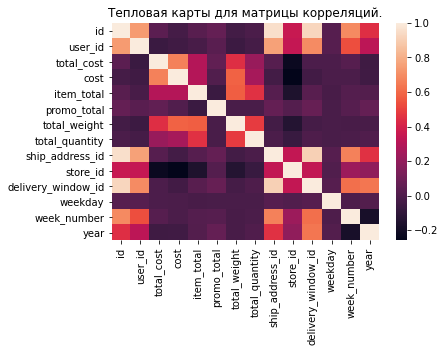

In [705]:
sns.heatmap(clean_orders.corr());
plt.title('Тепловая карты для матрицы корреляций.')
plt.show()

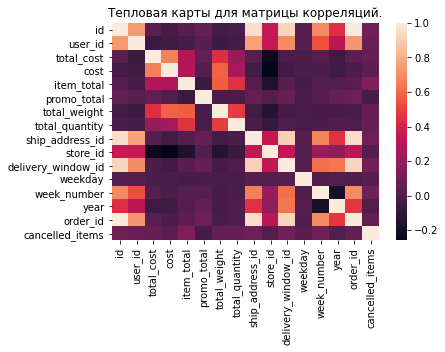

In [706]:
sns.heatmap(clean_orders_with_c.corr());
plt.title('Тепловая карты для матрицы корреляций.')
plt.show()

In [709]:
# есть какая-то корреляция между номером недели и клиентом, адресом и слотом доставки
clean_orders.pivot_table(index=('year','week_number'), values=('id'), aggfunc='count')

id
year week_number       
2018 1              683
     34             553
     35            3706
     36            3633
     37            3812
...                 ...
2019 46           29577
     47           35291
     48           38641
     49           40243
     50           45802

[70 rows x 1 columns]

первая неделя 2019 года убежала в 2018, это надо поправить, но в целом картина логичная - количество заказов и нумерация заказов растет со временем, поэтому возникает корреляция между номером недели и заказами.

#  Выводы

## Период

Реестр содержит заказы с 2018-08-26 по 2019-12-18. В начале и конце периода неполные месяцы, но там почти полные недели. 2018-08-26 это воскресенье и данные есть прямо с полуночи, а вот конец периода 2019-12-18 - это среда и не полный день. Обрезую три последних дня, чтобы не искажать статистику по неделям, а по месяцам анализирую с учетом неполных месяцев по краям.

## Аномалии

Три случая отрицательных значений в стоимости доставки, не существенно для анализа данных, но стоит обратить внимание в целом с точки зрения возможных убытков из-за ошибок.

Есть и очень дорогие доставки, но их менее 1% случаев - не похоже на ошибки (заказы большие по сумме и весу).

Выявлены заказы в нулевым весом или очень маленьким весом (менее 50 граммов) - возможно, это редкая ошибка в заполнении веса заказов (доли процента от общего количества заказов) и 26 заказов с нулевым количеством продуктов (но есть стоимость, вес и даже платная доставка).

Обнаружены 9 заказов с нулевой стоимостью, при этом у заказов есть вес (от 5 г до 18 кг) и товары в составе (от 3 до 18 товаров). 7 таких заказов отправлены ретейлеру №1 (из них 6 - в город №1, один - в город №2), ещё два заказа отправлены в город №13 ритейлерам №8 и 15.

Аналогичный анализ надо провести для заказов менее 100 и, возможно, 500 рублей. 

Доля этих заказов очень небольшая, но интересно из изучить с точки зрения рисков мошенничества.

## Описание тренда

Рост количества пользователей и заказов начался в середине 2019 года, а затем в октябре произошел резкий скачок. 

6-7 августа 2019 есть нетипичный для всего периода провал в количестве заказов. Возможно, что 6 августа (или с конца дня 5 августа) были перебои в работе сайта или мобильного приложения. В течение 7-8 августа объем заказов восстановился.

## Дни недели
Есть выраженная корреляция между днем недели (пн-вс) и такими показателями как средняя сумма заказа, средний вес заказа и среднее количество позиций в заказе, и заметная корреляция с количеством заказов. Не знаю, как эта информация может быть полезна бизнесу. Возможно, полезно более подробно изучить эту корреляцию для планирования нагрузки на курьеров.

## Когорты
Хотя у нас период обрезан сначала, но всё-таки он длинный и интересно было посмотреть на когорты клиентов. Я выделила когорты по месяцу первого заказа и проанализировала количество размещенных заказов каждой когортой. Ожидаемо, что в пиковый период пришло больше всего именно новых пользователей и они разместили много первых заказов. 

Интересно, что количество заказов на пользователя в месяц мало менялось с конца 2018 года. Но некоторое повышение произошло как раз в районе середины 2019 года и максимальной величины этот показатель достиг именно в месяцы пикового роста - ноябрь 2020 года. То есть тут есть и повышение повторных заказов за короткий период. Можно углубитсья и покопаться, кто именно размещал больше повторных заказов.

Также ожидаемо, что среднее количество заказов на пользователя коллелирует с возрастом когорты, то есть клиенты магазина лояльны и продолжают снова и снова размещать заказы. Тут немного странно, что у клиентов августа-2018 этот показатель аномально высокий (почти в два раза выше сентября), но у нас августа обрезанный, так что выводы не сделать. 

Далее можно сравнить когорты за одинаковые периоды. Взять, например, трехмесячные периоды, и сравнить когорты по количеству заказов на человека за первые три месяца. В связи с ограниченным временем в рамках данного отчета я дальше углубляться не стала.

С 2018-09 количество новых пользователей в месяц снижается постепенно вплоть до 2019-04, после чего начинается резкий всплеск. Нельзя исключать влияние на отчет того, что у нас обрезанный период и "новые клиенты" могут быть не очень новые в начале отчета, но потом уже явно виден приток новых клиентов с апреля 2019, поэтому те маркетинговые усилия, которые проводились в это время явно были правильные и привлекли много новых клиентов.


## Отмены заказов

В таблице с отменами все id продуктов разные, хотя не может быть, чтобы каждый продукт отменили только по одному разу и больше никогда с продуктом такого не случалось. Возможно, тут какой-то динамический id продукта, который присваивается при помещении в корзину или при подтверждении заказа. Было бы полезно иметь статистику по постоянным id товаров, выявлять конкретные товары, по которым есть проблемы с доступностью и работать с поставщиками для улучшения доступности ассортимента, или выявлять "рискованных" поставщиков и работать с альтернативными.

Соединив общую таблицу заказов с реестром отмен, удалось составить рейтинг магазинов по доле отменных продуктов от общего числа заказанных продуктов за весь период и в динамике по месяцам, то есть можно посмотреть отдельно по каждому магазину, как меняется доля отменных продуктов от общего числа продуктов и при росте доли адресно работать с магазинами по улучшению этого показателя.

Например, самая высокая доля отмененных продуктов в целом за период в магазинах №128, 238, 258, 257, 57. А растет эта доля в магазинах № 8, 57, 92. Соответственно, магазин №57 нуждается в проверке в первую очередь.

Посмотреть на рейтинг можно <a href='#link1'> тут</a>.
Аналогичный рейтинг можно составить и по заменам.

## Отрицательные выводы
В этом разделе я опишу те моменты, которые не удалось посмотреть (не успела) или удалось посмотреть и ничего интересного не выявилось. Отрицательный результат - это тоже иногда интересный результат.

Нельзя сказать, что есть какая-то тенденция в среднем количестве продуктов в заказе в целом за период и в среднем количестве продуктов в заказе. Если копать дальше, я бы посмотрела эти показатель по когортам, по городам, по магазинам и по ретейлерам, чтобы выявить признаки, коррелирующие с повторными заказами. Повторные заказы - это хорошо.

## Промо-коды
Доля заказов с промокодами от общего числа заказов в целом за период: 13,5%.

Доля скидки от общей суммы заказов со скидками: 8,3%

Хотя ежемесячная сумма промокодов растет в течение всего периода, но средняя сумма промокодов на количество заказов уменьшилась, а самая минимальная она в пиковый месяц ноябрь. Получается, что промокоды на этот пик не повлияли. 

## Что ещё интересно посмотреть, но я не успела:
- Посмотреть корреляцию между прокодами и другими показателями (количество заказов, количество продуктов в заказе и др).
- периодичность заказов (время между первым и следующим заказами) по каждому пользователю;
- заказы с большими суммами: есть ли общие признаки и тенденции;
- уточнить, item_total указана за вычетом промокода или нет. Если нет, то оценить долю очень маленьких заказов после вычета промокода из суммы
- показатели продаж в разрезе магазинов, ретейлеров, городов
Я не сделала аналитику по городам (из-за дефицита времени), но полезно посмотреть на динамику различных показателей по городам. Ожидаемо, города №1 и 2 будут идти с большим отрывом в абсолютных показателях, но можно посмотреть относительные приросты. 

Какие города/ретейлеры дали наибольший прирост в пиковое время, узнать, за счет чего, и попробовать повторить из опыт на других локациях. Также интересно отслеживать динамику различных показателей в разрезе городов и ретейлеров, чтобы вовремя заметить негативные тенденции и принять меры.

- среднее время доставки в разрезе магазинов (а также городов и ретейлеров), корреляцию среднего времени с другими показателями продаж.

